In [13]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [14]:
data_cycle = 'all_condition_stat_cycle_filtered.csv'

In [15]:
data = pd.read_csv("./data/"+data_cycle)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300,down
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300,down
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300,down
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300,down
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,580.818322,3.133201,2.587196,2.310177,0.213215,13.073614,1.431366,1.851970,54.386073,44.422093,...,-0.219265,-2.766058,4.170769,0.553080,0.067663,4,6.0,5000,500,up
215053,582.032368,3.721833,2.669275,3.034522,0.380387,14.117784,1.681629,3.203336,57.948220,42.156799,...,-0.161040,-2.854631,3.320326,0.233940,-0.496502,4,6.0,5000,500,up
215054,583.426041,3.511822,2.444397,2.999400,0.492054,13.476082,1.526276,2.936469,55.148492,43.277311,...,-0.034108,-2.835090,3.020172,0.207604,-0.521229,4,6.0,5000,500,up
215055,580.350537,3.449806,2.239240,3.012830,0.292238,10.928611,1.126394,1.072886,58.075829,45.329429,...,-0.153948,-3.146117,2.982659,0.284559,-0.278496,4,6.0,5000,500,up


In [16]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

# ***절삭깊이(Ap) - 다운밀링***

In [17]:
groups_ap = down.groupby('Ap')

In [18]:
ap_100 = groups_ap.get_group(1)
ap_100 = ap_100.reset_index(drop=True)
ap_100 = ap_100.drop(['Milling_Type'], axis=1)

ap_225 = groups_ap.get_group(2.25)
ap_225 = ap_225.reset_index(drop=True)
ap_225 = ap_225.drop(['Milling_Type'], axis=1)

ap_350 = groups_ap.get_group(3.5)
ap_350 = ap_350.reset_index(drop=True)
ap_350 = ap_350.drop(['Milling_Type'], axis=1)

ap_475 = groups_ap.get_group(4.75)
ap_475 = ap_475.reset_index(drop=True)
ap_475 = ap_475.drop(['Milling_Type'], axis=1)

ap_600 = groups_ap.get_group(6)
ap_600 = ap_600.reset_index(drop=True)
ap_600 = ap_600.drop(['Milling_Type'], axis=1)

In [19]:
ap_100

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.135774,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,0.127980,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,0.133384,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,0.142687,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,0.146143,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22511,121.469580,0.478653,0.444535,0.336421,0.024780,2.352541,2.085598,4.534339,63.750204,47.545987,...,0.196468,-0.022888,-0.452192,0.500787,0.202126,-0.365719,4,1.0,5000,500
22512,120.693473,0.467052,0.455130,0.339308,0.037821,2.581818,2.414298,6.596481,59.986057,46.218336,...,0.262413,0.017788,-0.531190,0.735722,0.161244,-0.420981,4,1.0,5000,500
22513,120.338674,0.485601,0.433030,0.354502,0.018035,2.273636,2.068207,4.414692,62.565169,45.234654,...,0.229323,0.032248,-0.424928,0.662534,0.248868,-0.251725,4,1.0,5000,500
22514,121.059665,0.460538,0.453211,0.322699,0.022562,2.591211,2.304352,5.906749,60.139868,46.071627,...,0.247978,0.036195,-0.455195,0.647885,0.139129,-0.682101,4,1.0,5000,500


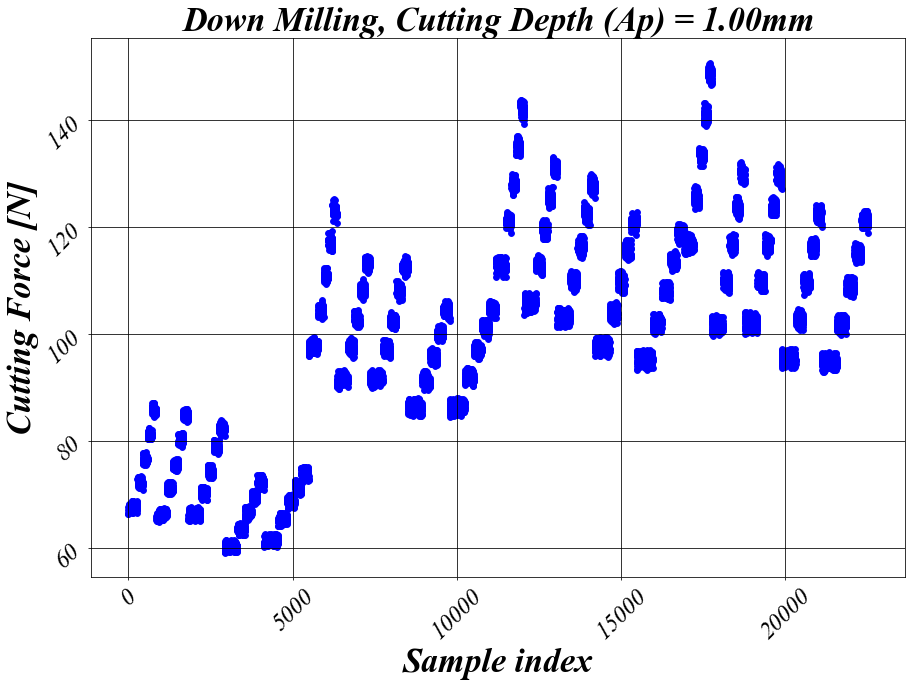

In [20]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 1.00mm',**tfont)
plt.scatter(range(0, len(ap_100['RMS_CF_max'])), ap_100['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

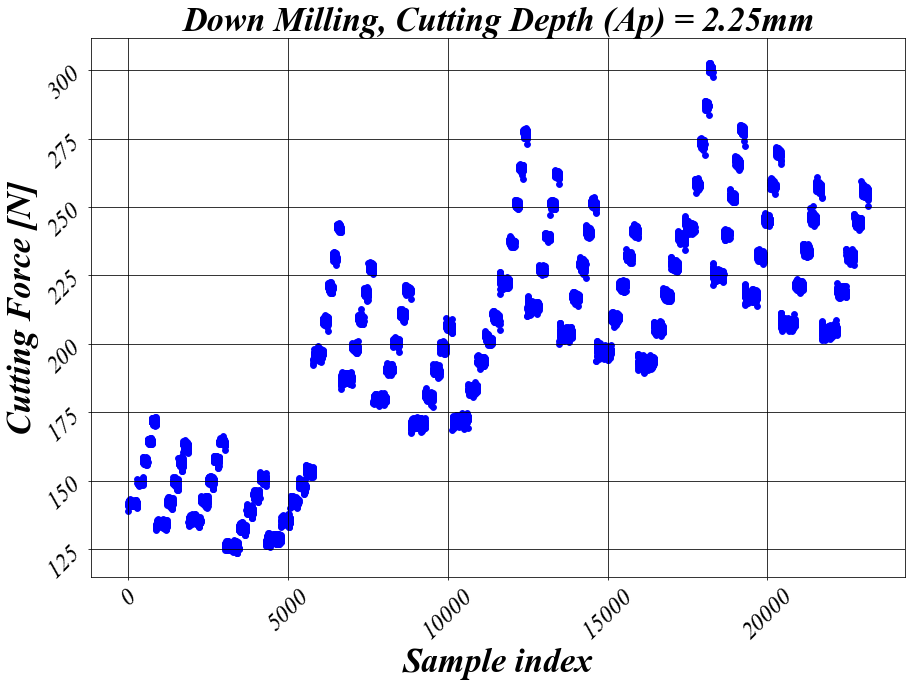

In [21]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 2.25mm',**tfont)
plt.scatter(range(0, len(ap_225['RMS_CF_max'])), ap_225['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 2.25mm.png")

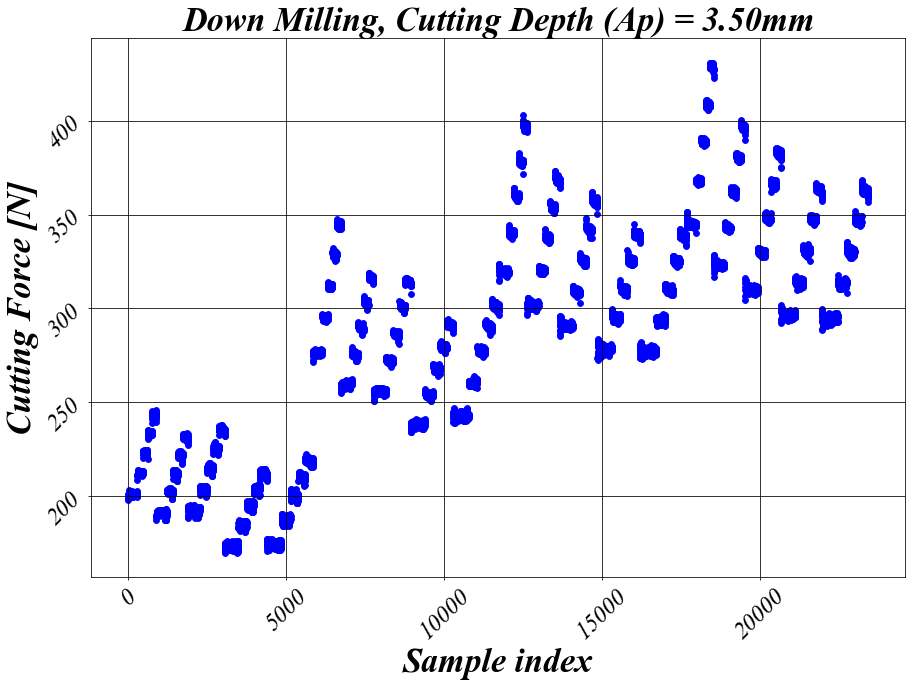

In [22]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 3.50mm',**tfont)
plt.scatter(range(0, len(ap_350['RMS_CF_max'])), ap_350['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 3.50mm.png")

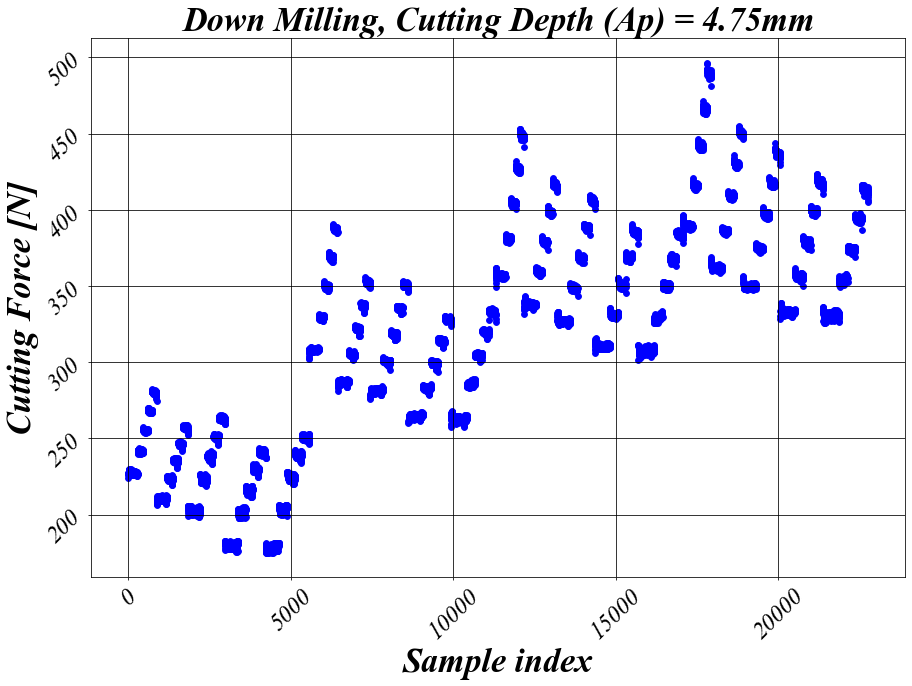

In [23]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 4.75mm',**tfont)
plt.scatter(range(0, len(ap_475['RMS_CF_max'])), ap_475['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 4.75mm.png")

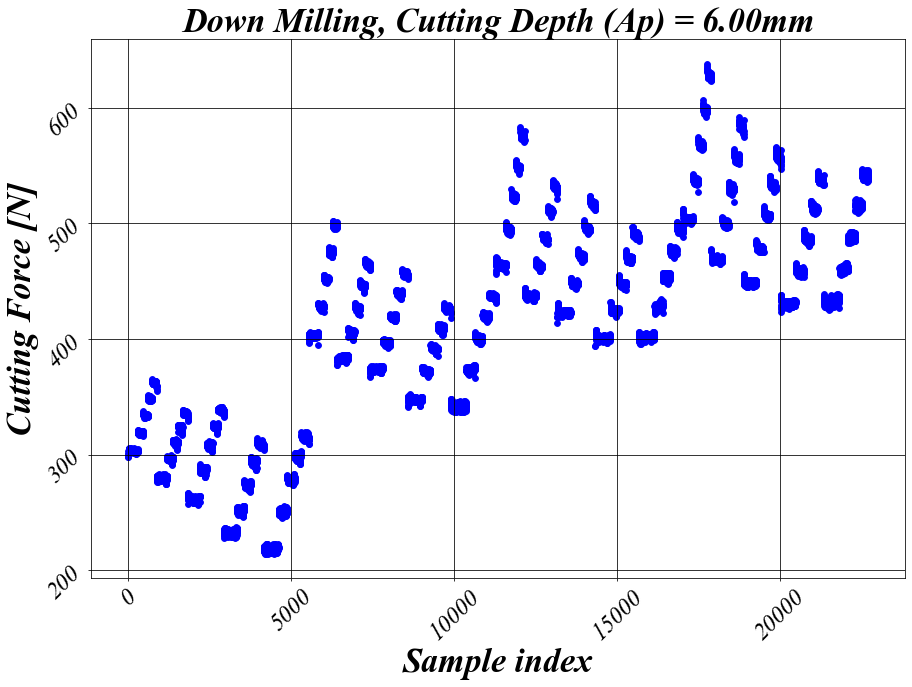

In [24]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 6.00mm',**tfont)
plt.scatter(range(0, len(ap_600['RMS_CF_max'])), ap_600['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 6.00mm.png")

# ***Ap 1 test***

In [25]:
train = pd.concat([ap_225, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [26]:
X_test = ap_100.iloc[: , 1:]
y_test = ap_100['RMS_CF_max']

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [28]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42, gpu_id=0)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:315.86156	validation_0-mape:0.98812	validation_1-rmse:97.91337	validation_1-mape:0.97492
[1]	validation_0-rmse:312.71926	validation_0-mape:0.97819	validation_1-rmse:96.00209	validation_1-mape:0.95535
[2]	validation_0-rmse:309.60846	validation_0-mape:0.96836	validation_1-rmse:94.11035	validation_1-mape:0.93599
[3]	validation_0-rmse:306.52881	validation_0-mape:0.95863	validation_1-rmse:92.23609	validation_1-mape:0.91679
[4]	validation_0-rmse:303.48002	validation_0-mape:0.94900	validation_1-rmse:90.38101	validation_1-mape:0.89780
[5]	validation_0-rmse:300.46145	validation_0-mape:0.93946	validation_1-rmse:88.54691	validation_1-mape:0.87900
[6]	validation_0-rmse:297.47532	validation_0-mape:0.93001	validation_1-rmse:86.75453	validation_1-mape:0.86054
[7]	validation_0-rmse:294.51691	validation_0-mape:0.92066	validation_1-rmse:84.95599	validation_1-mape:0.84210
[8]	validation_0-rmse:291.58751	validation_0-mape:0.91141	validation_1-rmse:83.22769	validation_1-mape:0.82422
[

[74]	validation_0-rmse:150.95591	validation_0-mape:0.46755	validation_1-rmse:10.92934	validation_1-mape:0.09455
[75]	validation_0-rmse:149.46087	validation_0-mape:0.46284	validation_1-rmse:10.98181	validation_1-mape:0.09740
[76]	validation_0-rmse:147.97996	validation_0-mape:0.45818	validation_1-rmse:11.11242	validation_1-mape:0.10077
[77]	validation_0-rmse:146.51427	validation_0-mape:0.45357	validation_1-rmse:11.27355	validation_1-mape:0.10416
[78]	validation_0-rmse:145.06361	validation_0-mape:0.44900	validation_1-rmse:11.52053	validation_1-mape:0.10809
[79]	validation_0-rmse:143.62614	validation_0-mape:0.44448	validation_1-rmse:11.81928	validation_1-mape:0.11249
[80]	validation_0-rmse:142.20385	validation_0-mape:0.44000	validation_1-rmse:12.15614	validation_1-mape:0.11716
[81]	validation_0-rmse:140.79565	validation_0-mape:0.43558	validation_1-rmse:12.54566	validation_1-mape:0.12208
[82]	validation_0-rmse:139.40226	validation_0-mape:0.43119	validation_1-rmse:12.97617	validation_1-mape:

[148]	validation_0-rmse:72.49015	validation_0-mape:0.22096	validation_1-rmse:47.63943	validation_1-mape:0.50497
[149]	validation_0-rmse:71.78027	validation_0-mape:0.21873	validation_1-rmse:48.08558	validation_1-mape:0.50973
[150]	validation_0-rmse:71.07449	validation_0-mape:0.21653	validation_1-rmse:48.50553	validation_1-mape:0.51414
[151]	validation_0-rmse:70.37570	validation_0-mape:0.21436	validation_1-rmse:48.92160	validation_1-mape:0.51850
[152]	validation_0-rmse:69.68428	validation_0-mape:0.21220	validation_1-rmse:49.33405	validation_1-mape:0.52282
[153]	validation_0-rmse:69.00282	validation_0-mape:0.21006	validation_1-rmse:49.74594	validation_1-mape:0.52716
[154]	validation_0-rmse:68.32759	validation_0-mape:0.20794	validation_1-rmse:50.06876	validation_1-mape:0.53060
[155]	validation_0-rmse:67.65663	validation_0-mape:0.20585	validation_1-rmse:50.46946	validation_1-mape:0.53479
[156]	validation_0-rmse:66.99504	validation_0-mape:0.20377	validation_1-rmse:50.89835	validation_1-mape:

[222]	validation_0-rmse:35.21025	validation_0-mape:0.10452	validation_1-rmse:69.89629	validation_1-mape:0.73733
[223]	validation_0-rmse:34.87508	validation_0-mape:0.10347	validation_1-rmse:70.05784	validation_1-mape:0.73903
[224]	validation_0-rmse:34.54194	validation_0-mape:0.10243	validation_1-rmse:70.27270	validation_1-mape:0.74126
[225]	validation_0-rmse:34.21231	validation_0-mape:0.10140	validation_1-rmse:70.49686	validation_1-mape:0.74371
[226]	validation_0-rmse:33.88586	validation_0-mape:0.10039	validation_1-rmse:70.70885	validation_1-mape:0.74591
[227]	validation_0-rmse:33.56294	validation_0-mape:0.09938	validation_1-rmse:70.91932	validation_1-mape:0.74810
[228]	validation_0-rmse:33.24433	validation_0-mape:0.09838	validation_1-rmse:71.05779	validation_1-mape:0.74952
[229]	validation_0-rmse:32.92804	validation_0-mape:0.09739	validation_1-rmse:71.26857	validation_1-mape:0.75183
[230]	validation_0-rmse:32.61513	validation_0-mape:0.09642	validation_1-rmse:71.49275	validation_1-mape:

[296]	validation_0-rmse:17.78175	validation_0-mape:0.04996	validation_1-rmse:79.92698	validation_1-mape:0.84124
[297]	validation_0-rmse:17.62693	validation_0-mape:0.04948	validation_1-rmse:80.01951	validation_1-mape:0.84217
[298]	validation_0-rmse:17.47469	validation_0-mape:0.04900	validation_1-rmse:80.08926	validation_1-mape:0.84290
[299]	validation_0-rmse:17.32352	validation_0-mape:0.04853	validation_1-rmse:80.17930	validation_1-mape:0.84381
[300]	validation_0-rmse:17.17482	validation_0-mape:0.04806	validation_1-rmse:80.24711	validation_1-mape:0.84452
[301]	validation_0-rmse:17.02659	validation_0-mape:0.04760	validation_1-rmse:80.33506	validation_1-mape:0.84540
[302]	validation_0-rmse:16.88103	validation_0-mape:0.04714	validation_1-rmse:80.40208	validation_1-mape:0.84611
[303]	validation_0-rmse:16.73634	validation_0-mape:0.04669	validation_1-rmse:80.48549	validation_1-mape:0.84695
[304]	validation_0-rmse:16.59295	validation_0-mape:0.04624	validation_1-rmse:80.58761	validation_1-mape:

[370]	validation_0-rmse:9.95568	validation_0-mape:0.02584	validation_1-rmse:85.06830	validation_1-mape:0.89339
[371]	validation_0-rmse:9.89021	validation_0-mape:0.02564	validation_1-rmse:85.11589	validation_1-mape:0.89387
[372]	validation_0-rmse:9.82412	validation_0-mape:0.02545	validation_1-rmse:85.16924	validation_1-mape:0.89441
[373]	validation_0-rmse:9.75862	validation_0-mape:0.02526	validation_1-rmse:85.22199	validation_1-mape:0.89495
[374]	validation_0-rmse:9.69554	validation_0-mape:0.02507	validation_1-rmse:85.26764	validation_1-mape:0.89541
[375]	validation_0-rmse:9.63164	validation_0-mape:0.02488	validation_1-rmse:85.31999	validation_1-mape:0.89594
[376]	validation_0-rmse:9.56777	validation_0-mape:0.02469	validation_1-rmse:85.37174	validation_1-mape:0.89645
[377]	validation_0-rmse:9.50700	validation_0-mape:0.02451	validation_1-rmse:85.41597	validation_1-mape:0.89690
[378]	validation_0-rmse:9.44580	validation_0-mape:0.02433	validation_1-rmse:85.46472	validation_1-mape:0.89739
[

[444]	validation_0-rmse:6.74296	validation_0-mape:0.01660	validation_1-rmse:87.91111	validation_1-mape:0.92190
[445]	validation_0-rmse:6.71767	validation_0-mape:0.01653	validation_1-rmse:87.93951	validation_1-mape:0.92218
[446]	validation_0-rmse:6.69220	validation_0-mape:0.01646	validation_1-rmse:87.97034	validation_1-mape:0.92249
[447]	validation_0-rmse:6.66732	validation_0-mape:0.01639	validation_1-rmse:87.99827	validation_1-mape:0.92276
[448]	validation_0-rmse:6.64288	validation_0-mape:0.01632	validation_1-rmse:88.03165	validation_1-mape:0.92309
[449]	validation_0-rmse:6.61905	validation_0-mape:0.01626	validation_1-rmse:88.05871	validation_1-mape:0.92335
[450]	validation_0-rmse:6.59503	validation_0-mape:0.01619	validation_1-rmse:88.09036	validation_1-mape:0.92367
[451]	validation_0-rmse:6.57150	validation_0-mape:0.01613	validation_1-rmse:88.10977	validation_1-mape:0.92386
[452]	validation_0-rmse:6.54807	validation_0-mape:0.01606	validation_1-rmse:88.13859	validation_1-mape:0.92415
[

[518]	validation_0-rmse:5.54181	validation_0-mape:0.01341	validation_1-rmse:89.42969	validation_1-mape:0.93672
[519]	validation_0-rmse:5.53204	validation_0-mape:0.01338	validation_1-rmse:89.43956	validation_1-mape:0.93682
[520]	validation_0-rmse:5.52308	validation_0-mape:0.01336	validation_1-rmse:89.46488	validation_1-mape:0.93714
[521]	validation_0-rmse:5.51396	validation_0-mape:0.01334	validation_1-rmse:89.48069	validation_1-mape:0.93728
[522]	validation_0-rmse:5.50488	validation_0-mape:0.01331	validation_1-rmse:89.49380	validation_1-mape:0.93741
[523]	validation_0-rmse:5.49573	validation_0-mape:0.01329	validation_1-rmse:89.50036	validation_1-mape:0.93748
[524]	validation_0-rmse:5.48661	validation_0-mape:0.01327	validation_1-rmse:89.51190	validation_1-mape:0.93759
[525]	validation_0-rmse:5.47770	validation_0-mape:0.01325	validation_1-rmse:89.52856	validation_1-mape:0.93774
[526]	validation_0-rmse:5.46900	validation_0-mape:0.01322	validation_1-rmse:89.54109	validation_1-mape:0.93786
[

[592]	validation_0-rmse:5.06106	validation_0-mape:0.01224	validation_1-rmse:90.28133	validation_1-mape:0.94503
[593]	validation_0-rmse:5.05691	validation_0-mape:0.01223	validation_1-rmse:90.29411	validation_1-mape:0.94516
[594]	validation_0-rmse:5.05261	validation_0-mape:0.01222	validation_1-rmse:90.29990	validation_1-mape:0.94521
[595]	validation_0-rmse:5.04860	validation_0-mape:0.01222	validation_1-rmse:90.31837	validation_1-mape:0.94543
[596]	validation_0-rmse:5.04461	validation_0-mape:0.01221	validation_1-rmse:90.33162	validation_1-mape:0.94555
[597]	validation_0-rmse:5.04017	validation_0-mape:0.01220	validation_1-rmse:90.33910	validation_1-mape:0.94562
[598]	validation_0-rmse:5.03596	validation_0-mape:0.01219	validation_1-rmse:90.34700	validation_1-mape:0.94570
[599]	validation_0-rmse:5.03194	validation_0-mape:0.01218	validation_1-rmse:90.36266	validation_1-mape:0.94589
[600]	validation_0-rmse:5.02808	validation_0-mape:0.01217	validation_1-rmse:90.37269	validation_1-mape:0.94599
[

[666]	validation_0-rmse:4.80062	validation_0-mape:0.01164	validation_1-rmse:90.94353	validation_1-mape:0.95113
[667]	validation_0-rmse:4.79782	validation_0-mape:0.01163	validation_1-rmse:90.95380	validation_1-mape:0.95122
[668]	validation_0-rmse:4.79535	validation_0-mape:0.01163	validation_1-rmse:90.96652	validation_1-mape:0.95133
[669]	validation_0-rmse:4.79228	validation_0-mape:0.01162	validation_1-rmse:90.97259	validation_1-mape:0.95138
[670]	validation_0-rmse:4.78919	validation_0-mape:0.01161	validation_1-rmse:90.98558	validation_1-mape:0.95149
[671]	validation_0-rmse:4.78599	validation_0-mape:0.01160	validation_1-rmse:90.99591	validation_1-mape:0.95158
[672]	validation_0-rmse:4.78356	validation_0-mape:0.01160	validation_1-rmse:90.99865	validation_1-mape:0.95159
[673]	validation_0-rmse:4.78068	validation_0-mape:0.01159	validation_1-rmse:91.00702	validation_1-mape:0.95166
[674]	validation_0-rmse:4.77754	validation_0-mape:0.01158	validation_1-rmse:91.01972	validation_1-mape:0.95177
[

[740]	validation_0-rmse:4.60362	validation_0-mape:0.01117	validation_1-rmse:91.50025	validation_1-mape:0.95577
[741]	validation_0-rmse:4.60130	validation_0-mape:0.01117	validation_1-rmse:91.50965	validation_1-mape:0.95585
[742]	validation_0-rmse:4.59872	validation_0-mape:0.01116	validation_1-rmse:91.51337	validation_1-mape:0.95588
[743]	validation_0-rmse:4.59658	validation_0-mape:0.01116	validation_1-rmse:91.51683	validation_1-mape:0.95591
[744]	validation_0-rmse:4.59355	validation_0-mape:0.01115	validation_1-rmse:91.52440	validation_1-mape:0.95597
[745]	validation_0-rmse:4.59093	validation_0-mape:0.01114	validation_1-rmse:91.52806	validation_1-mape:0.95600
[746]	validation_0-rmse:4.58893	validation_0-mape:0.01114	validation_1-rmse:91.53508	validation_1-mape:0.95606
[747]	validation_0-rmse:4.58679	validation_0-mape:0.01114	validation_1-rmse:91.53926	validation_1-mape:0.95610
[748]	validation_0-rmse:4.58519	validation_0-mape:0.01113	validation_1-rmse:91.54447	validation_1-mape:0.95614
[

[814]	validation_0-rmse:4.44867	validation_0-mape:0.01083	validation_1-rmse:91.99761	validation_1-mape:0.96058
[815]	validation_0-rmse:4.44725	validation_0-mape:0.01082	validation_1-rmse:92.02235	validation_1-mape:0.96087
[816]	validation_0-rmse:4.44547	validation_0-mape:0.01082	validation_1-rmse:92.02595	validation_1-mape:0.96090
[817]	validation_0-rmse:4.44361	validation_0-mape:0.01081	validation_1-rmse:92.02724	validation_1-mape:0.96091
[818]	validation_0-rmse:4.44133	validation_0-mape:0.01081	validation_1-rmse:92.03019	validation_1-mape:0.96094
[819]	validation_0-rmse:4.43932	validation_0-mape:0.01080	validation_1-rmse:92.03320	validation_1-mape:0.96096
[820]	validation_0-rmse:4.43764	validation_0-mape:0.01080	validation_1-rmse:92.03622	validation_1-mape:0.96099
[821]	validation_0-rmse:4.43573	validation_0-mape:0.01080	validation_1-rmse:92.03884	validation_1-mape:0.96101
[822]	validation_0-rmse:4.43319	validation_0-mape:0.01079	validation_1-rmse:92.03980	validation_1-mape:0.96101
[

[888]	validation_0-rmse:4.31644	validation_0-mape:0.01052	validation_1-rmse:92.36221	validation_1-mape:0.96373
[889]	validation_0-rmse:4.31395	validation_0-mape:0.01051	validation_1-rmse:92.38804	validation_1-mape:0.96397
[890]	validation_0-rmse:4.31202	validation_0-mape:0.01051	validation_1-rmse:92.39331	validation_1-mape:0.96400
[891]	validation_0-rmse:4.31039	validation_0-mape:0.01050	validation_1-rmse:92.39682	validation_1-mape:0.96404
[892]	validation_0-rmse:4.30893	validation_0-mape:0.01050	validation_1-rmse:92.40128	validation_1-mape:0.96407
[893]	validation_0-rmse:4.30733	validation_0-mape:0.01050	validation_1-rmse:92.40401	validation_1-mape:0.96409
[894]	validation_0-rmse:4.30572	validation_0-mape:0.01049	validation_1-rmse:92.40720	validation_1-mape:0.96412
[895]	validation_0-rmse:4.30374	validation_0-mape:0.01049	validation_1-rmse:92.41364	validation_1-mape:0.96417
[896]	validation_0-rmse:4.30225	validation_0-mape:0.01048	validation_1-rmse:92.41891	validation_1-mape:0.96422
[

[962]	validation_0-rmse:4.19603	validation_0-mape:0.01022	validation_1-rmse:92.68392	validation_1-mape:0.96639
[963]	validation_0-rmse:4.19476	validation_0-mape:0.01022	validation_1-rmse:92.68921	validation_1-mape:0.96644
[964]	validation_0-rmse:4.19273	validation_0-mape:0.01022	validation_1-rmse:92.68792	validation_1-mape:0.96642
[965]	validation_0-rmse:4.19113	validation_0-mape:0.01021	validation_1-rmse:92.69027	validation_1-mape:0.96644
[966]	validation_0-rmse:4.18931	validation_0-mape:0.01021	validation_1-rmse:92.69495	validation_1-mape:0.96648
[967]	validation_0-rmse:4.18770	validation_0-mape:0.01020	validation_1-rmse:92.70149	validation_1-mape:0.96654
[968]	validation_0-rmse:4.18648	validation_0-mape:0.01020	validation_1-rmse:92.70238	validation_1-mape:0.96655
[969]	validation_0-rmse:4.18469	validation_0-mape:0.01019	validation_1-rmse:92.70800	validation_1-mape:0.96660
[970]	validation_0-rmse:4.18316	validation_0-mape:0.01019	validation_1-rmse:92.71927	validation_1-mape:0.96669
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [30]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 4.1406
Train MAPE: 1.0085
Test RMSE: 92.8450
Test MAPE: 96.7710


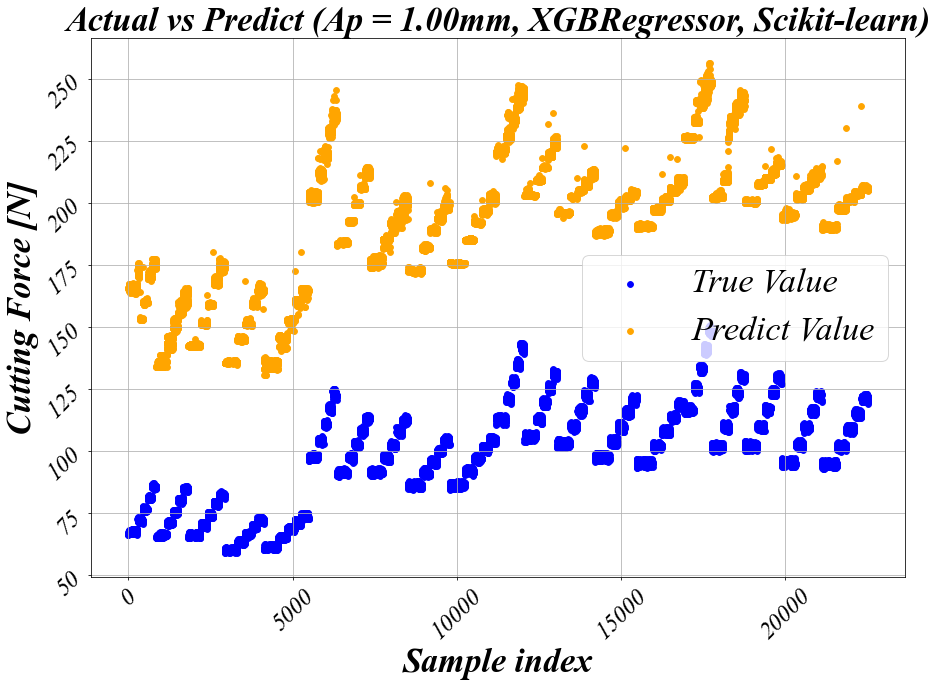

In [31]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 1.00mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

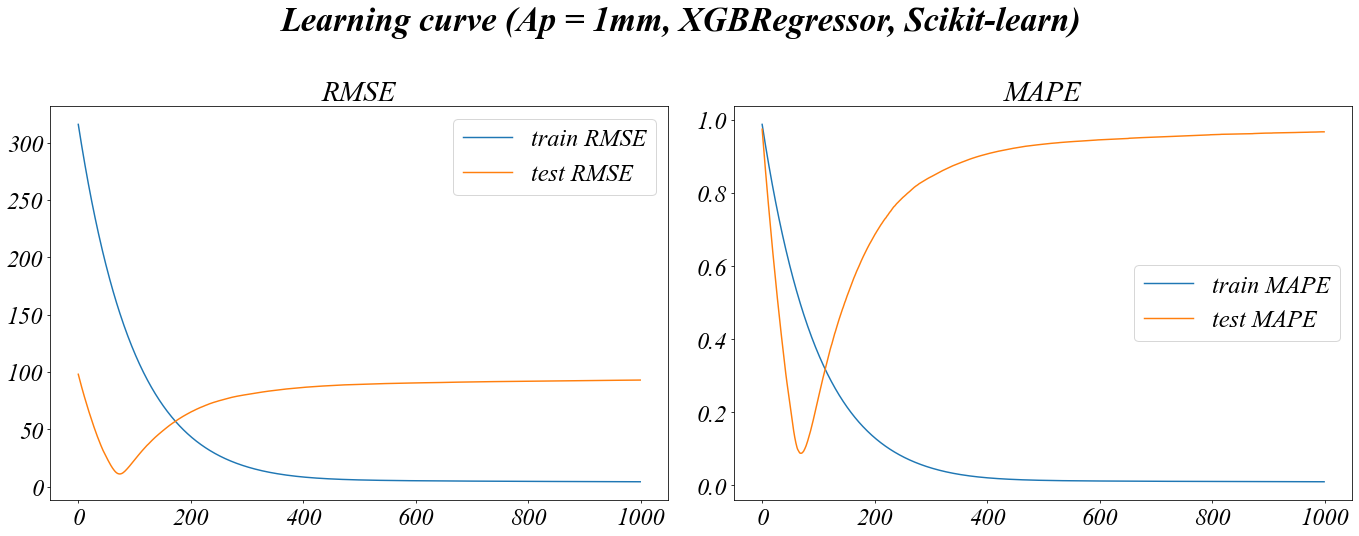

In [32]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 1mm_cycle.png")

# ***Ap 2.25 test***

In [33]:
train = pd.concat([ap_100, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [34]:
X_test = ap_225.iloc[: , 1:]
y_test = ap_225['RMS_CF_max']

In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [36]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:304.26100	validation_0-mape:0.98747	validation_1-rmse:200.91123	validation_1-mape:0.98367
[1]	validation_0-rmse:301.23381	validation_0-mape:0.97756	validation_1-rmse:198.17973	validation_1-mape:0.97010
[2]	validation_0-rmse:298.23698	validation_0-mape:0.96774	validation_1-rmse:195.47727	validation_1-mape:0.95667
[3]	validation_0-rmse:295.27031	validation_0-mape:0.95802	validation_1-rmse:192.79963	validation_1-mape:0.94337
[4]	validation_0-rmse:292.33331	validation_0-mape:0.94840	validation_1-rmse:190.15409	validation_1-mape:0.93022
[5]	validation_0-rmse:289.42580	validation_0-mape:0.93888	validation_1-rmse:187.55560	validation_1-mape:0.91728
[6]	validation_0-rmse:286.54759	validation_0-mape:0.92945	validation_1-rmse:184.98373	validation_1-mape:0.90449
[7]	validation_0-rmse:283.69817	validation_0-mape:0.92011	validation_1-rmse:182.41620	validation_1-mape:0.89172
[8]	validation_0-rmse:280.87732	validation_0-mape:0.91087	validation_1-rmse:179.89896	validation_1-mape:

[73]	validation_0-rmse:146.95688	validation_0-mape:0.47244	validation_1-rmse:62.42784	validation_1-mape:0.28951
[74]	validation_0-rmse:145.50422	validation_0-mape:0.46769	validation_1-rmse:61.15264	validation_1-mape:0.28294
[75]	validation_0-rmse:144.06514	validation_0-mape:0.46298	validation_1-rmse:59.93415	validation_1-mape:0.27676
[76]	validation_0-rmse:142.64161	validation_0-mape:0.45833	validation_1-rmse:58.68886	validation_1-mape:0.27033
[77]	validation_0-rmse:141.23175	validation_0-mape:0.45372	validation_1-rmse:57.57471	validation_1-mape:0.26460
[78]	validation_0-rmse:139.83633	validation_0-mape:0.44916	validation_1-rmse:56.43872	validation_1-mape:0.25860
[79]	validation_0-rmse:138.45519	validation_0-mape:0.44464	validation_1-rmse:55.24369	validation_1-mape:0.25244
[80]	validation_0-rmse:137.08714	validation_0-mape:0.44017	validation_1-rmse:54.12947	validation_1-mape:0.24677
[81]	validation_0-rmse:135.73299	validation_0-mape:0.43574	validation_1-rmse:52.97493	validation_1-mape:

[147]	validation_0-rmse:70.66297	validation_0-mape:0.22334	validation_1-rmse:16.10868	validation_1-mape:0.06478
[148]	validation_0-rmse:69.97047	validation_0-mape:0.22109	validation_1-rmse:16.31046	validation_1-mape:0.06646
[149]	validation_0-rmse:69.28560	validation_0-mape:0.21886	validation_1-rmse:16.53401	validation_1-mape:0.06820
[150]	validation_0-rmse:68.60767	validation_0-mape:0.21665	validation_1-rmse:16.75380	validation_1-mape:0.06988
[151]	validation_0-rmse:67.93624	validation_0-mape:0.21446	validation_1-rmse:17.00649	validation_1-mape:0.07167
[152]	validation_0-rmse:67.27203	validation_0-mape:0.21230	validation_1-rmse:17.25623	validation_1-mape:0.07340
[153]	validation_0-rmse:66.61327	validation_0-mape:0.21016	validation_1-rmse:17.52623	validation_1-mape:0.07522
[154]	validation_0-rmse:65.96224	validation_0-mape:0.20804	validation_1-rmse:17.79437	validation_1-mape:0.07698
[155]	validation_0-rmse:65.31760	validation_0-mape:0.20594	validation_1-rmse:18.08666	validation_1-mape:

[221]	validation_0-rmse:34.41909	validation_0-mape:0.10542	validation_1-rmse:38.19723	validation_1-mape:0.18854
[222]	validation_0-rmse:34.09055	validation_0-mape:0.10436	validation_1-rmse:38.44803	validation_1-mape:0.18984
[223]	validation_0-rmse:33.76541	validation_0-mape:0.10330	validation_1-rmse:38.69675	validation_1-mape:0.19114
[224]	validation_0-rmse:33.44409	validation_0-mape:0.10226	validation_1-rmse:38.92081	validation_1-mape:0.19233
[225]	validation_0-rmse:33.12706	validation_0-mape:0.10123	validation_1-rmse:39.14181	validation_1-mape:0.19348
[226]	validation_0-rmse:32.81299	validation_0-mape:0.10021	validation_1-rmse:39.35941	validation_1-mape:0.19461
[227]	validation_0-rmse:32.50141	validation_0-mape:0.09920	validation_1-rmse:39.57662	validation_1-mape:0.19577
[228]	validation_0-rmse:32.19256	validation_0-mape:0.09820	validation_1-rmse:39.80736	validation_1-mape:0.19694
[229]	validation_0-rmse:31.88777	validation_0-mape:0.09721	validation_1-rmse:40.00477	validation_1-mape:

[295]	validation_0-rmse:17.40936	validation_0-mape:0.05017	validation_1-rmse:50.46154	validation_1-mape:0.25283
[296]	validation_0-rmse:17.25894	validation_0-mape:0.04968	validation_1-rmse:50.55898	validation_1-mape:0.25334
[297]	validation_0-rmse:17.11040	validation_0-mape:0.04920	validation_1-rmse:50.65414	validation_1-mape:0.25384
[298]	validation_0-rmse:16.96345	validation_0-mape:0.04872	validation_1-rmse:50.79480	validation_1-mape:0.25460
[299]	validation_0-rmse:16.81771	validation_0-mape:0.04825	validation_1-rmse:50.93704	validation_1-mape:0.25536
[300]	validation_0-rmse:16.67253	validation_0-mape:0.04779	validation_1-rmse:51.03400	validation_1-mape:0.25586
[301]	validation_0-rmse:16.52795	validation_0-mape:0.04732	validation_1-rmse:51.16517	validation_1-mape:0.25658
[302]	validation_0-rmse:16.38731	validation_0-mape:0.04687	validation_1-rmse:51.26049	validation_1-mape:0.25709
[303]	validation_0-rmse:16.24756	validation_0-mape:0.04642	validation_1-rmse:51.35614	validation_1-mape:

[369]	validation_0-rmse:9.65001	validation_0-mape:0.02561	validation_1-rmse:56.96865	validation_1-mape:0.28764
[370]	validation_0-rmse:9.58174	validation_0-mape:0.02540	validation_1-rmse:57.02622	validation_1-mape:0.28792
[371]	validation_0-rmse:9.51436	validation_0-mape:0.02519	validation_1-rmse:57.08117	validation_1-mape:0.28818
[372]	validation_0-rmse:9.44784	validation_0-mape:0.02498	validation_1-rmse:57.13768	validation_1-mape:0.28845
[373]	validation_0-rmse:9.38255	validation_0-mape:0.02478	validation_1-rmse:57.19291	validation_1-mape:0.28871
[374]	validation_0-rmse:9.31772	validation_0-mape:0.02458	validation_1-rmse:57.24942	validation_1-mape:0.28899
[375]	validation_0-rmse:9.25413	validation_0-mape:0.02439	validation_1-rmse:57.30385	validation_1-mape:0.28924
[376]	validation_0-rmse:9.19136	validation_0-mape:0.02419	validation_1-rmse:57.35854	validation_1-mape:0.28950
[377]	validation_0-rmse:9.12897	validation_0-mape:0.02400	validation_1-rmse:57.41930	validation_1-mape:0.28981
[

[443]	validation_0-rmse:6.32092	validation_0-mape:0.01544	validation_1-rmse:59.72748	validation_1-mape:0.30171
[444]	validation_0-rmse:6.29430	validation_0-mape:0.01536	validation_1-rmse:59.75380	validation_1-mape:0.30185
[445]	validation_0-rmse:6.26799	validation_0-mape:0.01529	validation_1-rmse:59.77994	validation_1-mape:0.30198
[446]	validation_0-rmse:6.24235	validation_0-mape:0.01521	validation_1-rmse:59.80083	validation_1-mape:0.30208
[447]	validation_0-rmse:6.21676	validation_0-mape:0.01514	validation_1-rmse:59.82604	validation_1-mape:0.30221
[448]	validation_0-rmse:6.19266	validation_0-mape:0.01507	validation_1-rmse:59.85747	validation_1-mape:0.30235
[449]	validation_0-rmse:6.16787	validation_0-mape:0.01500	validation_1-rmse:59.87696	validation_1-mape:0.30245
[450]	validation_0-rmse:6.14269	validation_0-mape:0.01492	validation_1-rmse:59.90127	validation_1-mape:0.30258
[451]	validation_0-rmse:6.11878	validation_0-mape:0.01486	validation_1-rmse:59.92071	validation_1-mape:0.30267
[

[517]	validation_0-rmse:5.03412	validation_0-mape:0.01186	validation_1-rmse:61.37010	validation_1-mape:0.31017
[518]	validation_0-rmse:5.02329	validation_0-mape:0.01183	validation_1-rmse:61.39132	validation_1-mape:0.31028
[519]	validation_0-rmse:5.01289	validation_0-mape:0.01180	validation_1-rmse:61.40078	validation_1-mape:0.31032
[520]	validation_0-rmse:5.00197	validation_0-mape:0.01177	validation_1-rmse:61.41993	validation_1-mape:0.31041
[521]	validation_0-rmse:4.99169	validation_0-mape:0.01175	validation_1-rmse:61.42883	validation_1-mape:0.31045
[522]	validation_0-rmse:4.98200	validation_0-mape:0.01172	validation_1-rmse:61.44519	validation_1-mape:0.31053
[523]	validation_0-rmse:4.97213	validation_0-mape:0.01170	validation_1-rmse:61.45595	validation_1-mape:0.31058
[524]	validation_0-rmse:4.96237	validation_0-mape:0.01167	validation_1-rmse:61.47610	validation_1-mape:0.31068
[525]	validation_0-rmse:4.95236	validation_0-mape:0.01165	validation_1-rmse:61.48696	validation_1-mape:0.31074
[

[591]	validation_0-rmse:4.46187	validation_0-mape:0.01051	validation_1-rmse:62.04730	validation_1-mape:0.31342
[592]	validation_0-rmse:4.45685	validation_0-mape:0.01050	validation_1-rmse:62.05259	validation_1-mape:0.31345
[593]	validation_0-rmse:4.45172	validation_0-mape:0.01049	validation_1-rmse:62.05949	validation_1-mape:0.31348
[594]	validation_0-rmse:4.44669	validation_0-mape:0.01048	validation_1-rmse:62.06382	validation_1-mape:0.31350
[595]	validation_0-rmse:4.44171	validation_0-mape:0.01046	validation_1-rmse:62.07012	validation_1-mape:0.31353
[596]	validation_0-rmse:4.43620	validation_0-mape:0.01045	validation_1-rmse:62.07296	validation_1-mape:0.31354
[597]	validation_0-rmse:4.43159	validation_0-mape:0.01044	validation_1-rmse:62.07806	validation_1-mape:0.31356
[598]	validation_0-rmse:4.42674	validation_0-mape:0.01043	validation_1-rmse:62.08714	validation_1-mape:0.31361
[599]	validation_0-rmse:4.42236	validation_0-mape:0.01042	validation_1-rmse:62.09211	validation_1-mape:0.31363
[

[665]	validation_0-rmse:4.17870	validation_0-mape:0.00993	validation_1-rmse:62.39595	validation_1-mape:0.31513
[666]	validation_0-rmse:4.17442	validation_0-mape:0.00993	validation_1-rmse:62.39754	validation_1-mape:0.31513
[667]	validation_0-rmse:4.17208	validation_0-mape:0.00992	validation_1-rmse:62.40512	validation_1-mape:0.31517
[668]	validation_0-rmse:4.16988	validation_0-mape:0.00992	validation_1-rmse:62.40819	validation_1-mape:0.31519
[669]	validation_0-rmse:4.16698	validation_0-mape:0.00991	validation_1-rmse:62.40922	validation_1-mape:0.31519
[670]	validation_0-rmse:4.16335	validation_0-mape:0.00991	validation_1-rmse:62.41148	validation_1-mape:0.31521
[671]	validation_0-rmse:4.16072	validation_0-mape:0.00990	validation_1-rmse:62.41279	validation_1-mape:0.31521
[672]	validation_0-rmse:4.15779	validation_0-mape:0.00990	validation_1-rmse:62.41472	validation_1-mape:0.31522
[673]	validation_0-rmse:4.15501	validation_0-mape:0.00989	validation_1-rmse:62.41923	validation_1-mape:0.31524
[

[739]	validation_0-rmse:3.99341	validation_0-mape:0.00960	validation_1-rmse:62.64360	validation_1-mape:0.31627
[740]	validation_0-rmse:3.99145	validation_0-mape:0.00959	validation_1-rmse:62.64806	validation_1-mape:0.31629
[741]	validation_0-rmse:3.98933	validation_0-mape:0.00959	validation_1-rmse:62.65216	validation_1-mape:0.31631
[742]	validation_0-rmse:3.98741	validation_0-mape:0.00958	validation_1-rmse:62.65325	validation_1-mape:0.31632
[743]	validation_0-rmse:3.98508	validation_0-mape:0.00958	validation_1-rmse:62.65802	validation_1-mape:0.31635
[744]	validation_0-rmse:3.98305	validation_0-mape:0.00958	validation_1-rmse:62.65756	validation_1-mape:0.31634
[745]	validation_0-rmse:3.98029	validation_0-mape:0.00957	validation_1-rmse:62.66548	validation_1-mape:0.31639
[746]	validation_0-rmse:3.97842	validation_0-mape:0.00957	validation_1-rmse:62.66782	validation_1-mape:0.31640
[747]	validation_0-rmse:3.97633	validation_0-mape:0.00956	validation_1-rmse:62.66826	validation_1-mape:0.31640
[

[813]	validation_0-rmse:3.85167	validation_0-mape:0.00932	validation_1-rmse:62.78846	validation_1-mape:0.31694
[814]	validation_0-rmse:3.84931	validation_0-mape:0.00932	validation_1-rmse:62.81036	validation_1-mape:0.31705
[815]	validation_0-rmse:3.84765	validation_0-mape:0.00931	validation_1-rmse:62.81083	validation_1-mape:0.31705
[816]	validation_0-rmse:3.84618	validation_0-mape:0.00931	validation_1-rmse:62.81594	validation_1-mape:0.31707
[817]	validation_0-rmse:3.84406	validation_0-mape:0.00930	validation_1-rmse:62.81660	validation_1-mape:0.31708
[818]	validation_0-rmse:3.84209	validation_0-mape:0.00930	validation_1-rmse:62.82019	validation_1-mape:0.31709
[819]	validation_0-rmse:3.84051	validation_0-mape:0.00930	validation_1-rmse:62.82156	validation_1-mape:0.31710
[820]	validation_0-rmse:3.83884	validation_0-mape:0.00929	validation_1-rmse:62.82406	validation_1-mape:0.31711
[821]	validation_0-rmse:3.83678	validation_0-mape:0.00929	validation_1-rmse:62.82420	validation_1-mape:0.31712
[

[887]	validation_0-rmse:3.72356	validation_0-mape:0.00906	validation_1-rmse:63.04654	validation_1-mape:0.31822
[888]	validation_0-rmse:3.72169	validation_0-mape:0.00906	validation_1-rmse:63.04693	validation_1-mape:0.31822
[889]	validation_0-rmse:3.72020	validation_0-mape:0.00905	validation_1-rmse:63.04866	validation_1-mape:0.31822
[890]	validation_0-rmse:3.71823	validation_0-mape:0.00905	validation_1-rmse:63.04881	validation_1-mape:0.31822
[891]	validation_0-rmse:3.71660	validation_0-mape:0.00905	validation_1-rmse:63.05933	validation_1-mape:0.31826
[892]	validation_0-rmse:3.71447	validation_0-mape:0.00904	validation_1-rmse:63.06003	validation_1-mape:0.31827
[893]	validation_0-rmse:3.71290	validation_0-mape:0.00904	validation_1-rmse:63.06077	validation_1-mape:0.31827
[894]	validation_0-rmse:3.71162	validation_0-mape:0.00904	validation_1-rmse:63.06137	validation_1-mape:0.31827
[895]	validation_0-rmse:3.70975	validation_0-mape:0.00903	validation_1-rmse:63.06522	validation_1-mape:0.31829
[

[961]	validation_0-rmse:3.60836	validation_0-mape:0.00883	validation_1-rmse:63.22627	validation_1-mape:0.31900
[962]	validation_0-rmse:3.60698	validation_0-mape:0.00883	validation_1-rmse:63.22633	validation_1-mape:0.31900
[963]	validation_0-rmse:3.60557	validation_0-mape:0.00883	validation_1-rmse:63.22809	validation_1-mape:0.31901
[964]	validation_0-rmse:3.60441	validation_0-mape:0.00882	validation_1-rmse:63.23026	validation_1-mape:0.31902
[965]	validation_0-rmse:3.60259	validation_0-mape:0.00882	validation_1-rmse:63.23442	validation_1-mape:0.31904
[966]	validation_0-rmse:3.60083	validation_0-mape:0.00882	validation_1-rmse:63.23696	validation_1-mape:0.31905
[967]	validation_0-rmse:3.59908	validation_0-mape:0.00881	validation_1-rmse:63.24548	validation_1-mape:0.31909
[968]	validation_0-rmse:3.59801	validation_0-mape:0.00881	validation_1-rmse:63.24770	validation_1-mape:0.31910
[969]	validation_0-rmse:3.59624	validation_0-mape:0.00881	validation_1-rmse:63.25015	validation_1-mape:0.31911
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [37]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.5539
Train MAPE: 0.8713
Test RMSE: 63.3062
Test MAPE: 31.9389


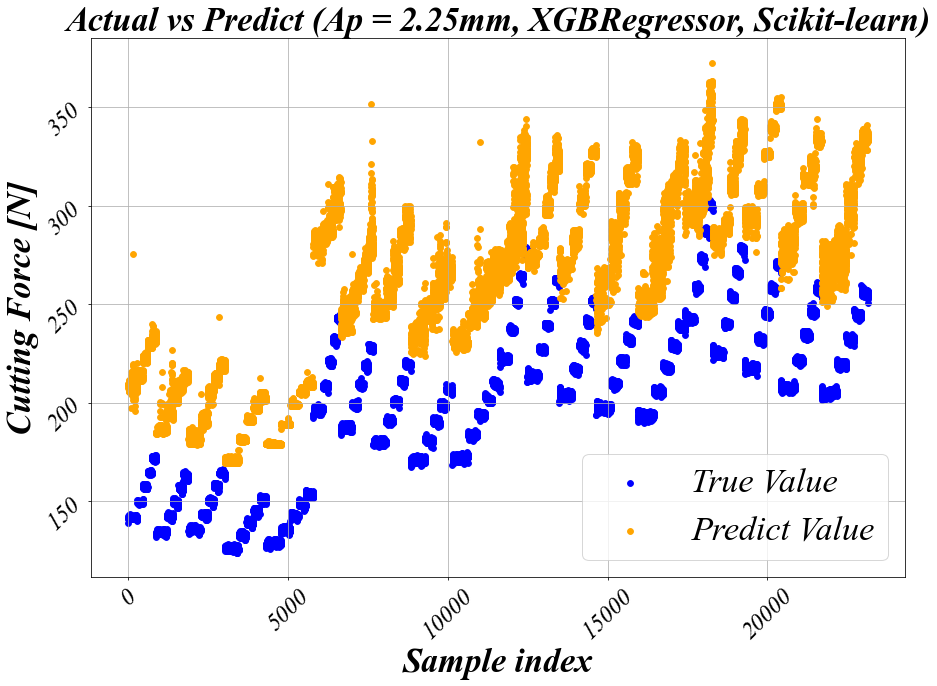

In [38]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 2.25mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

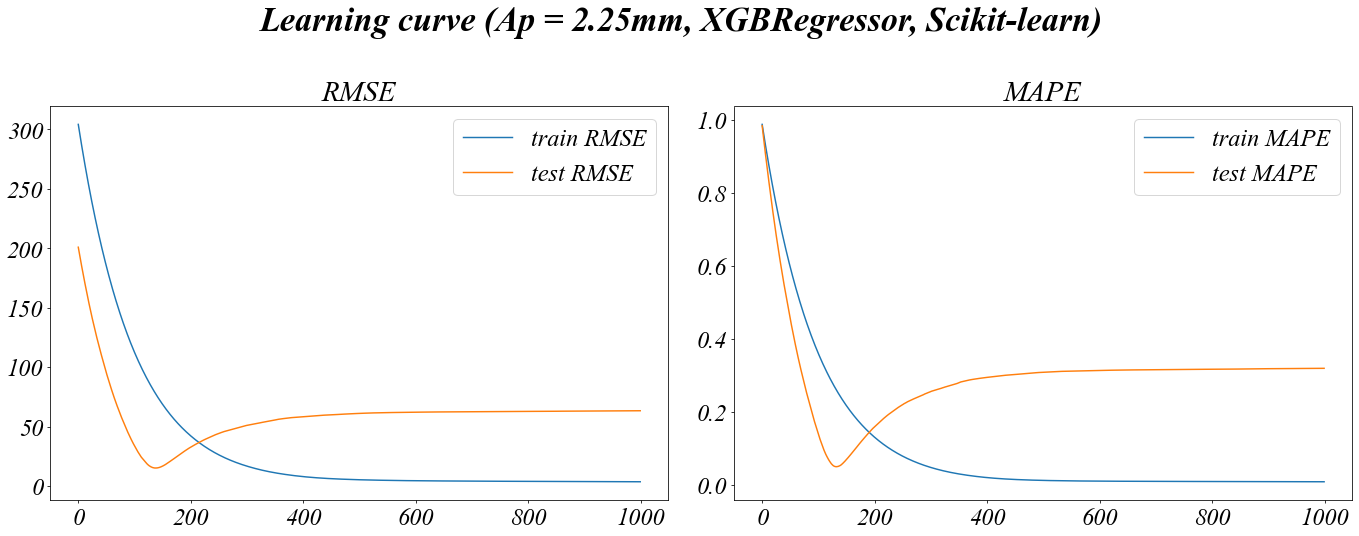

In [39]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 2.25mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 2.25mm_cycle.png")

# ***Ap 3.5 test***

In [40]:
train = pd.concat([ap_100, ap_225, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [41]:
X_test = ap_350.iloc[: , 1:]
y_test = ap_350['RMS_CF_max']

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [43]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:286.52307	validation_0-mape:0.98729	validation_1-rmse:286.11290	validation_1-mape:0.98713
[1]	validation_0-rmse:283.66912	validation_0-mape:0.97740	validation_1-rmse:282.98628	validation_1-mape:0.97623
[2]	validation_0-rmse:280.84379	validation_0-mape:0.96760	validation_1-rmse:279.88959	validation_1-mape:0.96543
[3]	validation_0-rmse:278.04699	validation_0-mape:0.95790	validation_1-rmse:276.82575	validation_1-mape:0.95475
[4]	validation_0-rmse:275.27836	validation_0-mape:0.94830	validation_1-rmse:273.79641	validation_1-mape:0.94419
[5]	validation_0-rmse:272.53736	validation_0-mape:0.93880	validation_1-rmse:270.79175	validation_1-mape:0.93371
[6]	validation_0-rmse:269.82398	validation_0-mape:0.92939	validation_1-rmse:267.81769	validation_1-mape:0.92329
[7]	validation_0-rmse:267.13769	validation_0-mape:0.92007	validation_1-rmse:264.86828	validation_1-mape:0.91301
[8]	validation_0-rmse:264.47845	validation_0-mape:0.91084	validation_1-rmse:261.95275	validation_1-mape:

[73]	validation_0-rmse:138.23103	validation_0-mape:0.47282	validation_1-rmse:126.33252	validation_1-mape:0.42537
[74]	validation_0-rmse:136.86073	validation_0-mape:0.46807	validation_1-rmse:124.87619	validation_1-mape:0.42022
[75]	validation_0-rmse:135.50481	validation_0-mape:0.46336	validation_1-rmse:123.49691	validation_1-mape:0.41530
[76]	validation_0-rmse:134.16164	validation_0-mape:0.45871	validation_1-rmse:122.07022	validation_1-mape:0.41028
[77]	validation_0-rmse:132.83161	validation_0-mape:0.45410	validation_1-rmse:120.64173	validation_1-mape:0.40527
[78]	validation_0-rmse:131.51557	validation_0-mape:0.44954	validation_1-rmse:119.23694	validation_1-mape:0.40032
[79]	validation_0-rmse:130.21141	validation_0-mape:0.44502	validation_1-rmse:117.81854	validation_1-mape:0.39538
[80]	validation_0-rmse:128.92141	validation_0-mape:0.44055	validation_1-rmse:116.46228	validation_1-mape:0.39063
[81]	validation_0-rmse:127.64464	validation_0-mape:0.43612	validation_1-rmse:115.15871	validatio

[146]	validation_0-rmse:66.94336	validation_0-mape:0.22613	validation_1-rmse:50.54727	validation_1-mape:0.15862
[147]	validation_0-rmse:66.28249	validation_0-mape:0.22386	validation_1-rmse:49.86269	validation_1-mape:0.15621
[148]	validation_0-rmse:65.62831	validation_0-mape:0.22160	validation_1-rmse:49.17849	validation_1-mape:0.15380
[149]	validation_0-rmse:64.98257	validation_0-mape:0.21937	validation_1-rmse:48.54165	validation_1-mape:0.15150
[150]	validation_0-rmse:64.34337	validation_0-mape:0.21717	validation_1-rmse:47.88490	validation_1-mape:0.14910
[151]	validation_0-rmse:63.70979	validation_0-mape:0.21498	validation_1-rmse:47.32074	validation_1-mape:0.14706
[152]	validation_0-rmse:63.08220	validation_0-mape:0.21282	validation_1-rmse:46.76155	validation_1-mape:0.14504
[153]	validation_0-rmse:62.46100	validation_0-mape:0.21067	validation_1-rmse:46.20506	validation_1-mape:0.14300
[154]	validation_0-rmse:61.84612	validation_0-mape:0.20855	validation_1-rmse:45.65747	validation_1-mape:

[220]	validation_0-rmse:32.32196	validation_0-mape:0.10697	validation_1-rmse:18.25139	validation_1-mape:0.04157
[221]	validation_0-rmse:32.00834	validation_0-mape:0.10589	validation_1-rmse:17.98555	validation_1-mape:0.04071
[222]	validation_0-rmse:31.69790	validation_0-mape:0.10483	validation_1-rmse:17.72548	validation_1-mape:0.03987
[223]	validation_0-rmse:31.39071	validation_0-mape:0.10377	validation_1-rmse:17.46853	validation_1-mape:0.03906
[224]	validation_0-rmse:31.08628	validation_0-mape:0.10273	validation_1-rmse:17.20885	validation_1-mape:0.03824
[225]	validation_0-rmse:30.78525	validation_0-mape:0.10169	validation_1-rmse:16.96800	validation_1-mape:0.03751
[226]	validation_0-rmse:30.48794	validation_0-mape:0.10067	validation_1-rmse:16.77986	validation_1-mape:0.03693
[227]	validation_0-rmse:30.19280	validation_0-mape:0.09966	validation_1-rmse:16.54098	validation_1-mape:0.03626
[228]	validation_0-rmse:29.90081	validation_0-mape:0.09865	validation_1-rmse:16.31568	validation_1-mape:

[294]	validation_0-rmse:15.99686	validation_0-mape:0.05062	validation_1-rmse:12.24082	validation_1-mape:0.03646
[295]	validation_0-rmse:15.85117	validation_0-mape:0.05011	validation_1-rmse:12.27222	validation_1-mape:0.03668
[296]	validation_0-rmse:15.70655	validation_0-mape:0.04962	validation_1-rmse:12.30406	validation_1-mape:0.03689
[297]	validation_0-rmse:15.56452	validation_0-mape:0.04912	validation_1-rmse:12.34284	validation_1-mape:0.03713
[298]	validation_0-rmse:15.42273	validation_0-mape:0.04863	validation_1-rmse:12.37550	validation_1-mape:0.03734
[299]	validation_0-rmse:15.28296	validation_0-mape:0.04815	validation_1-rmse:12.41079	validation_1-mape:0.03756
[300]	validation_0-rmse:15.14464	validation_0-mape:0.04767	validation_1-rmse:12.44936	validation_1-mape:0.03777
[301]	validation_0-rmse:15.00779	validation_0-mape:0.04719	validation_1-rmse:12.49632	validation_1-mape:0.03802
[302]	validation_0-rmse:14.87229	validation_0-mape:0.04672	validation_1-rmse:12.53792	validation_1-mape:

[368]	validation_0-rmse:8.52504	validation_0-mape:0.02466	validation_1-rmse:15.73952	validation_1-mape:0.05184
[369]	validation_0-rmse:8.46090	validation_0-mape:0.02443	validation_1-rmse:15.78792	validation_1-mape:0.05203
[370]	validation_0-rmse:8.39724	validation_0-mape:0.02421	validation_1-rmse:15.82715	validation_1-mape:0.05219
[371]	validation_0-rmse:8.33391	validation_0-mape:0.02399	validation_1-rmse:15.87507	validation_1-mape:0.05237
[372]	validation_0-rmse:8.27205	validation_0-mape:0.02378	validation_1-rmse:15.91761	validation_1-mape:0.05253
[373]	validation_0-rmse:8.21077	validation_0-mape:0.02356	validation_1-rmse:15.96531	validation_1-mape:0.05271
[374]	validation_0-rmse:8.14986	validation_0-mape:0.02335	validation_1-rmse:16.00603	validation_1-mape:0.05287
[375]	validation_0-rmse:8.08917	validation_0-mape:0.02314	validation_1-rmse:16.04926	validation_1-mape:0.05303
[376]	validation_0-rmse:8.02969	validation_0-mape:0.02294	validation_1-rmse:16.08964	validation_1-mape:0.05319
[

[442]	validation_0-rmse:5.30204	validation_0-mape:0.01371	validation_1-rmse:18.35599	validation_1-mape:0.06155
[443]	validation_0-rmse:5.27539	validation_0-mape:0.01363	validation_1-rmse:18.39122	validation_1-mape:0.06168
[444]	validation_0-rmse:5.24946	validation_0-mape:0.01354	validation_1-rmse:18.41843	validation_1-mape:0.06178
[445]	validation_0-rmse:5.22348	validation_0-mape:0.01345	validation_1-rmse:18.45178	validation_1-mape:0.06191
[446]	validation_0-rmse:5.19818	validation_0-mape:0.01337	validation_1-rmse:18.47709	validation_1-mape:0.06199
[447]	validation_0-rmse:5.17274	validation_0-mape:0.01329	validation_1-rmse:18.50506	validation_1-mape:0.06209
[448]	validation_0-rmse:5.14777	validation_0-mape:0.01321	validation_1-rmse:18.53565	validation_1-mape:0.06220
[449]	validation_0-rmse:5.12294	validation_0-mape:0.01312	validation_1-rmse:18.56430	validation_1-mape:0.06230
[450]	validation_0-rmse:5.09902	validation_0-mape:0.01305	validation_1-rmse:18.58845	validation_1-mape:0.06238
[

[516]	validation_0-rmse:4.00608	validation_0-mape:0.00979	validation_1-rmse:19.85707	validation_1-mape:0.06692
[517]	validation_0-rmse:3.99616	validation_0-mape:0.00976	validation_1-rmse:19.86701	validation_1-mape:0.06695
[518]	validation_0-rmse:3.98571	validation_0-mape:0.00974	validation_1-rmse:19.87906	validation_1-mape:0.06700
[519]	validation_0-rmse:3.97456	validation_0-mape:0.00971	validation_1-rmse:19.89160	validation_1-mape:0.06704
[520]	validation_0-rmse:3.96449	validation_0-mape:0.00968	validation_1-rmse:19.90332	validation_1-mape:0.06709
[521]	validation_0-rmse:3.95368	validation_0-mape:0.00966	validation_1-rmse:19.91586	validation_1-mape:0.06713
[522]	validation_0-rmse:3.94406	validation_0-mape:0.00963	validation_1-rmse:19.92757	validation_1-mape:0.06717
[523]	validation_0-rmse:3.93362	validation_0-mape:0.00961	validation_1-rmse:19.93853	validation_1-mape:0.06721
[524]	validation_0-rmse:3.92410	validation_0-mape:0.00958	validation_1-rmse:19.95290	validation_1-mape:0.06727
[

[590]	validation_0-rmse:3.48408	validation_0-mape:0.00857	validation_1-rmse:20.54299	validation_1-mape:0.06937
[591]	validation_0-rmse:3.47909	validation_0-mape:0.00856	validation_1-rmse:20.54977	validation_1-mape:0.06939
[592]	validation_0-rmse:3.47447	validation_0-mape:0.00855	validation_1-rmse:20.55706	validation_1-mape:0.06942
[593]	validation_0-rmse:3.47016	validation_0-mape:0.00854	validation_1-rmse:20.56393	validation_1-mape:0.06944
[594]	validation_0-rmse:3.46547	validation_0-mape:0.00853	validation_1-rmse:20.57138	validation_1-mape:0.06947
[595]	validation_0-rmse:3.46066	validation_0-mape:0.00852	validation_1-rmse:20.57800	validation_1-mape:0.06949
[596]	validation_0-rmse:3.45637	validation_0-mape:0.00851	validation_1-rmse:20.58469	validation_1-mape:0.06951
[597]	validation_0-rmse:3.45170	validation_0-mape:0.00850	validation_1-rmse:20.59206	validation_1-mape:0.06954
[598]	validation_0-rmse:3.44685	validation_0-mape:0.00850	validation_1-rmse:20.59951	validation_1-mape:0.06956
[

[664]	validation_0-rmse:3.23032	validation_0-mape:0.00807	validation_1-rmse:20.91949	validation_1-mape:0.07075
[665]	validation_0-rmse:3.22784	validation_0-mape:0.00807	validation_1-rmse:20.92288	validation_1-mape:0.07076
[666]	validation_0-rmse:3.22463	validation_0-mape:0.00806	validation_1-rmse:20.92616	validation_1-mape:0.07077
[667]	validation_0-rmse:3.22279	validation_0-mape:0.00806	validation_1-rmse:20.92955	validation_1-mape:0.07079
[668]	validation_0-rmse:3.22043	validation_0-mape:0.00806	validation_1-rmse:20.93326	validation_1-mape:0.07080
[669]	validation_0-rmse:3.21730	validation_0-mape:0.00805	validation_1-rmse:20.93648	validation_1-mape:0.07082
[670]	validation_0-rmse:3.21485	validation_0-mape:0.00804	validation_1-rmse:20.94543	validation_1-mape:0.07084
[671]	validation_0-rmse:3.21215	validation_0-mape:0.00804	validation_1-rmse:20.94648	validation_1-mape:0.07085
[672]	validation_0-rmse:3.21040	validation_0-mape:0.00804	validation_1-rmse:20.94990	validation_1-mape:0.07086
[

[738]	validation_0-rmse:3.07968	validation_0-mape:0.00777	validation_1-rmse:21.15453	validation_1-mape:0.07160
[739]	validation_0-rmse:3.07807	validation_0-mape:0.00777	validation_1-rmse:21.15614	validation_1-mape:0.07161
[740]	validation_0-rmse:3.07663	validation_0-mape:0.00777	validation_1-rmse:21.15704	validation_1-mape:0.07161
[741]	validation_0-rmse:3.07513	validation_0-mape:0.00776	validation_1-rmse:21.16059	validation_1-mape:0.07163
[742]	validation_0-rmse:3.07342	validation_0-mape:0.00776	validation_1-rmse:21.16429	validation_1-mape:0.07164
[743]	validation_0-rmse:3.07215	validation_0-mape:0.00776	validation_1-rmse:21.16491	validation_1-mape:0.07164
[744]	validation_0-rmse:3.07034	validation_0-mape:0.00775	validation_1-rmse:21.16594	validation_1-mape:0.07165
[745]	validation_0-rmse:3.06907	validation_0-mape:0.00775	validation_1-rmse:21.16741	validation_1-mape:0.07165
[746]	validation_0-rmse:3.06735	validation_0-mape:0.00775	validation_1-rmse:21.16746	validation_1-mape:0.07165
[

[812]	validation_0-rmse:2.97272	validation_0-mape:0.00759	validation_1-rmse:21.27365	validation_1-mape:0.07201
[813]	validation_0-rmse:2.97133	validation_0-mape:0.00759	validation_1-rmse:21.27438	validation_1-mape:0.07202
[814]	validation_0-rmse:2.96987	validation_0-mape:0.00759	validation_1-rmse:21.27609	validation_1-mape:0.07202
[815]	validation_0-rmse:2.96860	validation_0-mape:0.00758	validation_1-rmse:21.27648	validation_1-mape:0.07202
[816]	validation_0-rmse:2.96781	validation_0-mape:0.00758	validation_1-rmse:21.27755	validation_1-mape:0.07203
[817]	validation_0-rmse:2.96686	validation_0-mape:0.00758	validation_1-rmse:21.27862	validation_1-mape:0.07203
[818]	validation_0-rmse:2.96552	validation_0-mape:0.00758	validation_1-rmse:21.28086	validation_1-mape:0.07204
[819]	validation_0-rmse:2.96383	validation_0-mape:0.00757	validation_1-rmse:21.28348	validation_1-mape:0.07205
[820]	validation_0-rmse:2.96190	validation_0-mape:0.00757	validation_1-rmse:21.28485	validation_1-mape:0.07205
[

[886]	validation_0-rmse:2.87416	validation_0-mape:0.00741	validation_1-rmse:21.38834	validation_1-mape:0.07249
[887]	validation_0-rmse:2.87284	validation_0-mape:0.00741	validation_1-rmse:21.38890	validation_1-mape:0.07249
[888]	validation_0-rmse:2.87208	validation_0-mape:0.00741	validation_1-rmse:21.39019	validation_1-mape:0.07249
[889]	validation_0-rmse:2.87062	validation_0-mape:0.00741	validation_1-rmse:21.39269	validation_1-mape:0.07250
[890]	validation_0-rmse:2.86968	validation_0-mape:0.00741	validation_1-rmse:21.39271	validation_1-mape:0.07250
[891]	validation_0-rmse:2.86891	validation_0-mape:0.00741	validation_1-rmse:21.39404	validation_1-mape:0.07251
[892]	validation_0-rmse:2.86756	validation_0-mape:0.00740	validation_1-rmse:21.39520	validation_1-mape:0.07251
[893]	validation_0-rmse:2.86576	validation_0-mape:0.00740	validation_1-rmse:21.39673	validation_1-mape:0.07252
[894]	validation_0-rmse:2.86481	validation_0-mape:0.00740	validation_1-rmse:21.39850	validation_1-mape:0.07252
[

[960]	validation_0-rmse:2.78644	validation_0-mape:0.00725	validation_1-rmse:21.49225	validation_1-mape:0.07292
[961]	validation_0-rmse:2.78553	validation_0-mape:0.00725	validation_1-rmse:21.49250	validation_1-mape:0.07292
[962]	validation_0-rmse:2.78426	validation_0-mape:0.00725	validation_1-rmse:21.49297	validation_1-mape:0.07293
[963]	validation_0-rmse:2.78346	validation_0-mape:0.00725	validation_1-rmse:21.49451	validation_1-mape:0.07293
[964]	validation_0-rmse:2.78242	validation_0-mape:0.00724	validation_1-rmse:21.49532	validation_1-mape:0.07293
[965]	validation_0-rmse:2.78102	validation_0-mape:0.00724	validation_1-rmse:21.49734	validation_1-mape:0.07294
[966]	validation_0-rmse:2.78048	validation_0-mape:0.00724	validation_1-rmse:21.49754	validation_1-mape:0.07294
[967]	validation_0-rmse:2.77946	validation_0-mape:0.00724	validation_1-rmse:21.49870	validation_1-mape:0.07294
[968]	validation_0-rmse:2.77835	validation_0-mape:0.00724	validation_1-rmse:21.50028	validation_1-mape:0.07295
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [44]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 2.7448
Train MAPE: 0.7174
Test RMSE: 21.5329
Test MAPE: 7.3089


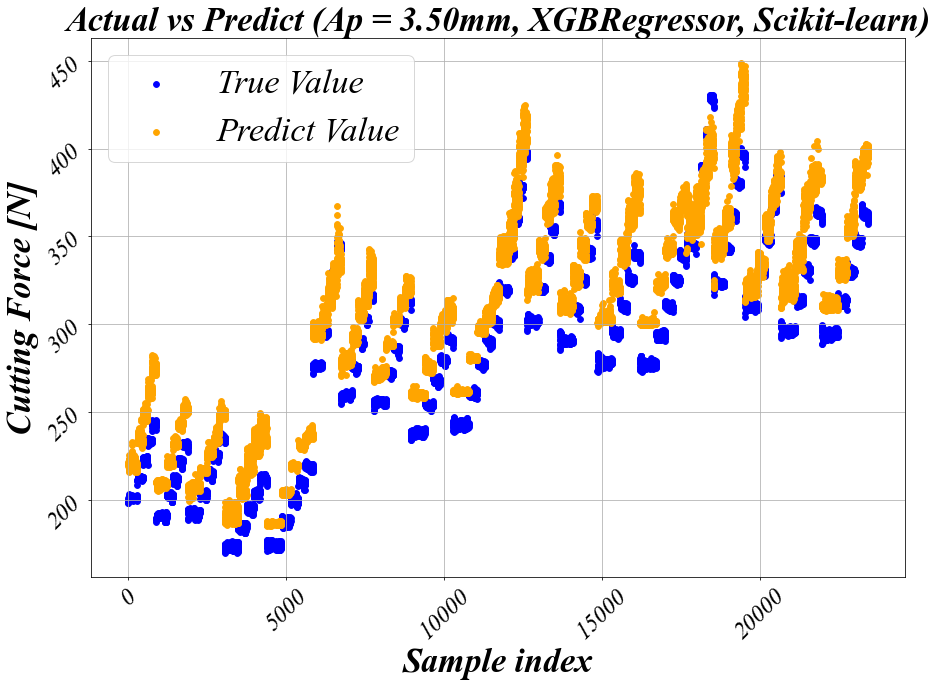

In [45]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 3.50mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

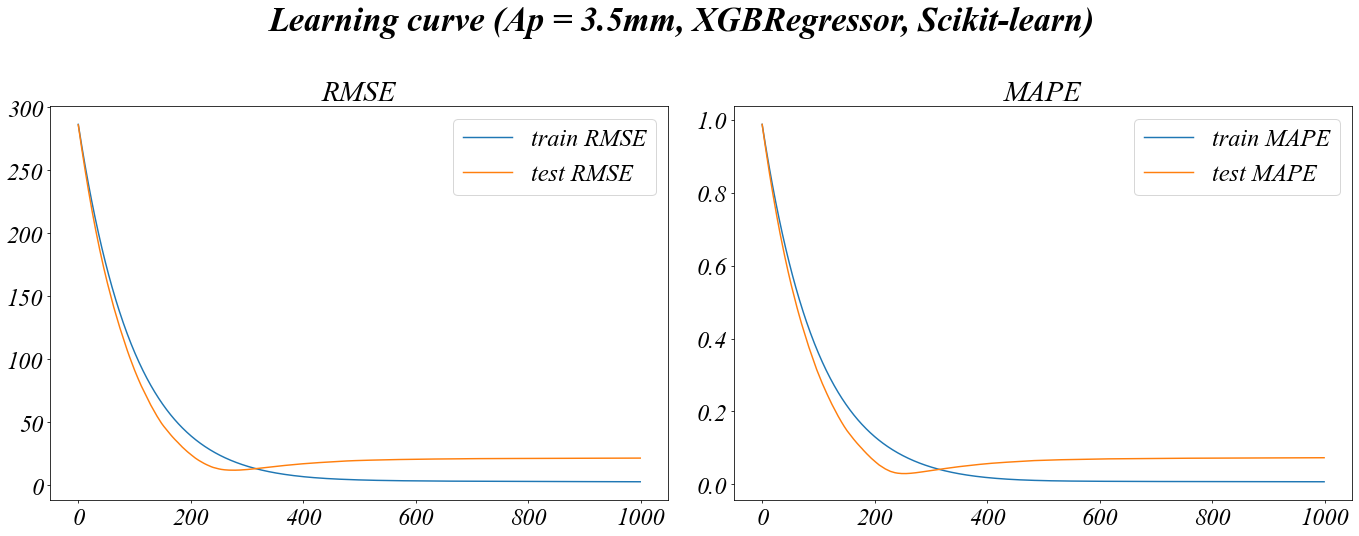

In [46]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 3.5mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 3.5mm_cycle.png")

# ***Ap 4.75 test***

In [47]:
train = pd.concat([ap_100, ap_225, ap_350, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [48]:
X_test = ap_475.iloc[: , 1:]
y_test = ap_475['RMS_CF_max']

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [50]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:276.90153	validation_0-mape:0.98724	validation_1-rmse:322.05363	validation_1-mape:0.98747
[1]	validation_0-rmse:274.14727	validation_0-mape:0.97733	validation_1-rmse:318.57233	validation_1-mape:0.97670
[2]	validation_0-rmse:271.42109	validation_0-mape:0.96751	validation_1-rmse:315.12928	validation_1-mape:0.96592
[3]	validation_0-rmse:268.72227	validation_0-mape:0.95780	validation_1-rmse:311.67480	validation_1-mape:0.95509
[4]	validation_0-rmse:266.05055	validation_0-mape:0.94818	validation_1-rmse:308.30175	validation_1-mape:0.94451
[5]	validation_0-rmse:263.40565	validation_0-mape:0.93866	validation_1-rmse:305.08774	validation_1-mape:0.93442
[6]	validation_0-rmse:260.78680	validation_0-mape:0.92923	validation_1-rmse:301.77588	validation_1-mape:0.92415
[7]	validation_0-rmse:258.19592	validation_0-mape:0.91989	validation_1-rmse:298.60802	validation_1-mape:0.91418
[8]	validation_0-rmse:255.63031	validation_0-mape:0.91065	validation_1-rmse:295.50410	validation_1-mape:

[73]	validation_0-rmse:133.73135	validation_0-mape:0.47212	validation_1-rmse:148.15547	validation_1-mape:0.43865
[74]	validation_0-rmse:132.40922	validation_0-mape:0.46737	validation_1-rmse:146.62363	validation_1-mape:0.43373
[75]	validation_0-rmse:131.09810	validation_0-mape:0.46267	validation_1-rmse:144.94144	validation_1-mape:0.42842
[76]	validation_0-rmse:129.80048	validation_0-mape:0.45802	validation_1-rmse:143.32849	validation_1-mape:0.42331
[77]	validation_0-rmse:128.51634	validation_0-mape:0.45340	validation_1-rmse:141.86732	validation_1-mape:0.41864
[78]	validation_0-rmse:127.24560	validation_0-mape:0.44884	validation_1-rmse:140.39992	validation_1-mape:0.41387
[79]	validation_0-rmse:125.98617	validation_0-mape:0.44432	validation_1-rmse:138.73899	validation_1-mape:0.40853
[80]	validation_0-rmse:124.74132	validation_0-mape:0.43984	validation_1-rmse:137.32963	validation_1-mape:0.40394
[81]	validation_0-rmse:123.50857	validation_0-mape:0.43541	validation_1-rmse:135.87528	validatio

[146]	validation_0-rmse:64.90575	validation_0-mape:0.22542	validation_1-rmse:68.33682	validation_1-mape:0.17505
[147]	validation_0-rmse:64.26825	validation_0-mape:0.22315	validation_1-rmse:67.67696	validation_1-mape:0.17291
[148]	validation_0-rmse:63.63757	validation_0-mape:0.22090	validation_1-rmse:67.04520	validation_1-mape:0.17081
[149]	validation_0-rmse:63.01492	validation_0-mape:0.21867	validation_1-rmse:66.38914	validation_1-mape:0.16863
[150]	validation_0-rmse:62.39793	validation_0-mape:0.21647	validation_1-rmse:65.76123	validation_1-mape:0.16654
[151]	validation_0-rmse:61.78662	validation_0-mape:0.21429	validation_1-rmse:65.11688	validation_1-mape:0.16442
[152]	validation_0-rmse:61.18169	validation_0-mape:0.21212	validation_1-rmse:64.50499	validation_1-mape:0.16238
[153]	validation_0-rmse:60.58306	validation_0-mape:0.20999	validation_1-rmse:63.88643	validation_1-mape:0.16042
[154]	validation_0-rmse:59.99035	validation_0-mape:0.20787	validation_1-rmse:63.29436	validation_1-mape:

[220]	validation_0-rmse:31.56243	validation_0-mape:0.10659	validation_1-rmse:39.47859	validation_1-mape:0.09683
[221]	validation_0-rmse:31.26098	validation_0-mape:0.10552	validation_1-rmse:39.30102	validation_1-mape:0.09643
[222]	validation_0-rmse:30.96271	validation_0-mape:0.10446	validation_1-rmse:39.12857	validation_1-mape:0.09605
[223]	validation_0-rmse:30.66759	validation_0-mape:0.10341	validation_1-rmse:38.96046	validation_1-mape:0.09568
[224]	validation_0-rmse:30.37549	validation_0-mape:0.10237	validation_1-rmse:38.79498	validation_1-mape:0.09530
[225]	validation_0-rmse:30.08704	validation_0-mape:0.10134	validation_1-rmse:38.64204	validation_1-mape:0.09495
[226]	validation_0-rmse:29.80077	validation_0-mape:0.10032	validation_1-rmse:38.48360	validation_1-mape:0.09460
[227]	validation_0-rmse:29.51769	validation_0-mape:0.09932	validation_1-rmse:38.33086	validation_1-mape:0.09425
[228]	validation_0-rmse:29.23737	validation_0-mape:0.09832	validation_1-rmse:38.17905	validation_1-mape:

[294]	validation_0-rmse:15.93581	validation_0-mape:0.05085	validation_1-rmse:33.75388	validation_1-mape:0.08247
[295]	validation_0-rmse:15.79763	validation_0-mape:0.05035	validation_1-rmse:33.75778	validation_1-mape:0.08248
[296]	validation_0-rmse:15.66110	validation_0-mape:0.04987	validation_1-rmse:33.75674	validation_1-mape:0.08248
[297]	validation_0-rmse:15.52561	validation_0-mape:0.04938	validation_1-rmse:33.75608	validation_1-mape:0.08247
[298]	validation_0-rmse:15.39196	validation_0-mape:0.04891	validation_1-rmse:33.75497	validation_1-mape:0.08247
[299]	validation_0-rmse:15.25877	validation_0-mape:0.04843	validation_1-rmse:33.74324	validation_1-mape:0.08244
[300]	validation_0-rmse:15.12697	validation_0-mape:0.04796	validation_1-rmse:33.73337	validation_1-mape:0.08241
[301]	validation_0-rmse:14.99656	validation_0-mape:0.04750	validation_1-rmse:33.72480	validation_1-mape:0.08239
[302]	validation_0-rmse:14.86769	validation_0-mape:0.04704	validation_1-rmse:33.71825	validation_1-mape:

[368]	validation_0-rmse:8.94882	validation_0-mape:0.02613	validation_1-rmse:35.14034	validation_1-mape:0.08626
[369]	validation_0-rmse:8.88951	validation_0-mape:0.02593	validation_1-rmse:35.16847	validation_1-mape:0.08633
[370]	validation_0-rmse:8.83162	validation_0-mape:0.02573	validation_1-rmse:35.19610	validation_1-mape:0.08641
[371]	validation_0-rmse:8.77398	validation_0-mape:0.02553	validation_1-rmse:35.22324	validation_1-mape:0.08649
[372]	validation_0-rmse:8.71706	validation_0-mape:0.02534	validation_1-rmse:35.24319	validation_1-mape:0.08655
[373]	validation_0-rmse:8.66130	validation_0-mape:0.02514	validation_1-rmse:35.27904	validation_1-mape:0.08666
[374]	validation_0-rmse:8.60405	validation_0-mape:0.02495	validation_1-rmse:35.30435	validation_1-mape:0.08673
[375]	validation_0-rmse:8.54754	validation_0-mape:0.02476	validation_1-rmse:35.33185	validation_1-mape:0.08681
[376]	validation_0-rmse:8.49196	validation_0-mape:0.02457	validation_1-rmse:35.35944	validation_1-mape:0.08690
[

[442]	validation_0-rmse:6.06842	validation_0-mape:0.01654	validation_1-rmse:36.96770	validation_1-mape:0.09245
[443]	validation_0-rmse:6.04530	validation_0-mape:0.01646	validation_1-rmse:36.99725	validation_1-mape:0.09257
[444]	validation_0-rmse:6.02352	validation_0-mape:0.01640	validation_1-rmse:37.01205	validation_1-mape:0.09261
[445]	validation_0-rmse:6.00193	validation_0-mape:0.01633	validation_1-rmse:37.03106	validation_1-mape:0.09271
[446]	validation_0-rmse:5.98041	validation_0-mape:0.01626	validation_1-rmse:37.04550	validation_1-mape:0.09275
[447]	validation_0-rmse:5.95864	validation_0-mape:0.01619	validation_1-rmse:37.07424	validation_1-mape:0.09286
[448]	validation_0-rmse:5.93704	validation_0-mape:0.01613	validation_1-rmse:37.10256	validation_1-mape:0.09297
[449]	validation_0-rmse:5.91587	validation_0-mape:0.01606	validation_1-rmse:37.11556	validation_1-mape:0.09301
[450]	validation_0-rmse:5.89482	validation_0-mape:0.01599	validation_1-rmse:37.14390	validation_1-mape:0.09311
[

[516]	validation_0-rmse:4.96203	validation_0-mape:0.01330	validation_1-rmse:38.84676	validation_1-mape:0.10006
[517]	validation_0-rmse:4.95237	validation_0-mape:0.01328	validation_1-rmse:38.88331	validation_1-mape:0.10021
[518]	validation_0-rmse:4.94379	validation_0-mape:0.01325	validation_1-rmse:38.88909	validation_1-mape:0.10022
[519]	validation_0-rmse:4.93428	validation_0-mape:0.01323	validation_1-rmse:38.90325	validation_1-mape:0.10028
[520]	validation_0-rmse:4.92578	validation_0-mape:0.01321	validation_1-rmse:38.91853	validation_1-mape:0.10034
[521]	validation_0-rmse:4.91688	validation_0-mape:0.01318	validation_1-rmse:38.94629	validation_1-mape:0.10044
[522]	validation_0-rmse:4.90872	validation_0-mape:0.01316	validation_1-rmse:38.95275	validation_1-mape:0.10046
[523]	validation_0-rmse:4.90061	validation_0-mape:0.01314	validation_1-rmse:38.96177	validation_1-mape:0.10049
[524]	validation_0-rmse:4.89146	validation_0-mape:0.01312	validation_1-rmse:38.99979	validation_1-mape:0.10065
[

[590]	validation_0-rmse:4.49316	validation_0-mape:0.01218	validation_1-rmse:40.07936	validation_1-mape:0.10510
[591]	validation_0-rmse:4.48887	validation_0-mape:0.01217	validation_1-rmse:40.08504	validation_1-mape:0.10512
[592]	validation_0-rmse:4.48405	validation_0-mape:0.01216	validation_1-rmse:40.10346	validation_1-mape:0.10520
[593]	validation_0-rmse:4.47920	validation_0-mape:0.01215	validation_1-rmse:40.10875	validation_1-mape:0.10522
[594]	validation_0-rmse:4.47579	validation_0-mape:0.01214	validation_1-rmse:40.11941	validation_1-mape:0.10526
[595]	validation_0-rmse:4.47155	validation_0-mape:0.01213	validation_1-rmse:40.13525	validation_1-mape:0.10533
[596]	validation_0-rmse:4.46707	validation_0-mape:0.01212	validation_1-rmse:40.15351	validation_1-mape:0.10541
[597]	validation_0-rmse:4.46287	validation_0-mape:0.01211	validation_1-rmse:40.16081	validation_1-mape:0.10544
[598]	validation_0-rmse:4.45874	validation_0-mape:0.01210	validation_1-rmse:40.16894	validation_1-mape:0.10548
[

[664]	validation_0-rmse:4.22739	validation_0-mape:0.01158	validation_1-rmse:40.66621	validation_1-mape:0.10747
[665]	validation_0-rmse:4.22480	validation_0-mape:0.01158	validation_1-rmse:40.67991	validation_1-mape:0.10753
[666]	validation_0-rmse:4.22247	validation_0-mape:0.01157	validation_1-rmse:40.68068	validation_1-mape:0.10754
[667]	validation_0-rmse:4.21935	validation_0-mape:0.01156	validation_1-rmse:40.70174	validation_1-mape:0.10762
[668]	validation_0-rmse:4.21666	validation_0-mape:0.01156	validation_1-rmse:40.70375	validation_1-mape:0.10763
[669]	validation_0-rmse:4.21429	validation_0-mape:0.01155	validation_1-rmse:40.70405	validation_1-mape:0.10764
[670]	validation_0-rmse:4.21152	validation_0-mape:0.01155	validation_1-rmse:40.71561	validation_1-mape:0.10769
[671]	validation_0-rmse:4.20888	validation_0-mape:0.01154	validation_1-rmse:40.71788	validation_1-mape:0.10770
[672]	validation_0-rmse:4.20672	validation_0-mape:0.01153	validation_1-rmse:40.71873	validation_1-mape:0.10771
[

[738]	validation_0-rmse:4.04657	validation_0-mape:0.01115	validation_1-rmse:40.94019	validation_1-mape:0.10861
[739]	validation_0-rmse:4.04447	validation_0-mape:0.01115	validation_1-rmse:40.94250	validation_1-mape:0.10862
[740]	validation_0-rmse:4.04203	validation_0-mape:0.01114	validation_1-rmse:40.94272	validation_1-mape:0.10862
[741]	validation_0-rmse:4.03948	validation_0-mape:0.01114	validation_1-rmse:40.94715	validation_1-mape:0.10863
[742]	validation_0-rmse:4.03756	validation_0-mape:0.01113	validation_1-rmse:40.94861	validation_1-mape:0.10863
[743]	validation_0-rmse:4.03538	validation_0-mape:0.01113	validation_1-rmse:40.94926	validation_1-mape:0.10864
[744]	validation_0-rmse:4.03323	validation_0-mape:0.01112	validation_1-rmse:40.94896	validation_1-mape:0.10863
[745]	validation_0-rmse:4.03105	validation_0-mape:0.01112	validation_1-rmse:40.95380	validation_1-mape:0.10865
[746]	validation_0-rmse:4.02935	validation_0-mape:0.01111	validation_1-rmse:40.95402	validation_1-mape:0.10865
[

[812]	validation_0-rmse:3.91221	validation_0-mape:0.01083	validation_1-rmse:41.07965	validation_1-mape:0.10921
[813]	validation_0-rmse:3.91102	validation_0-mape:0.01083	validation_1-rmse:41.07867	validation_1-mape:0.10921
[814]	validation_0-rmse:3.90929	validation_0-mape:0.01082	validation_1-rmse:41.07980	validation_1-mape:0.10921
[815]	validation_0-rmse:3.90756	validation_0-mape:0.01082	validation_1-rmse:41.08174	validation_1-mape:0.10922
[816]	validation_0-rmse:3.90593	validation_0-mape:0.01082	validation_1-rmse:41.08298	validation_1-mape:0.10923
[817]	validation_0-rmse:3.90458	validation_0-mape:0.01081	validation_1-rmse:41.08577	validation_1-mape:0.10923
[818]	validation_0-rmse:3.90294	validation_0-mape:0.01081	validation_1-rmse:41.08616	validation_1-mape:0.10923
[819]	validation_0-rmse:3.90142	validation_0-mape:0.01080	validation_1-rmse:41.08837	validation_1-mape:0.10924
[820]	validation_0-rmse:3.89997	validation_0-mape:0.01080	validation_1-rmse:41.08898	validation_1-mape:0.10925
[

[886]	validation_0-rmse:3.80400	validation_0-mape:0.01056	validation_1-rmse:41.22162	validation_1-mape:0.10982
[887]	validation_0-rmse:3.80282	validation_0-mape:0.01055	validation_1-rmse:41.22088	validation_1-mape:0.10982
[888]	validation_0-rmse:3.80137	validation_0-mape:0.01055	validation_1-rmse:41.22235	validation_1-mape:0.10982
[889]	validation_0-rmse:3.80001	validation_0-mape:0.01055	validation_1-rmse:41.22649	validation_1-mape:0.10983
[890]	validation_0-rmse:3.79851	validation_0-mape:0.01054	validation_1-rmse:41.23650	validation_1-mape:0.10987
[891]	validation_0-rmse:3.79738	validation_0-mape:0.01054	validation_1-rmse:41.23687	validation_1-mape:0.10987
[892]	validation_0-rmse:3.79559	validation_0-mape:0.01054	validation_1-rmse:41.25138	validation_1-mape:0.10993
[893]	validation_0-rmse:3.79426	validation_0-mape:0.01053	validation_1-rmse:41.25295	validation_1-mape:0.10994
[894]	validation_0-rmse:3.79282	validation_0-mape:0.01053	validation_1-rmse:41.25683	validation_1-mape:0.10997
[

[960]	validation_0-rmse:3.70250	validation_0-mape:0.01032	validation_1-rmse:41.41571	validation_1-mape:0.11085
[961]	validation_0-rmse:3.70124	validation_0-mape:0.01031	validation_1-rmse:41.41666	validation_1-mape:0.11085
[962]	validation_0-rmse:3.69991	validation_0-mape:0.01031	validation_1-rmse:41.41815	validation_1-mape:0.11086
[963]	validation_0-rmse:3.69885	validation_0-mape:0.01031	validation_1-rmse:41.41905	validation_1-mape:0.11086
[964]	validation_0-rmse:3.69751	validation_0-mape:0.01030	validation_1-rmse:41.41935	validation_1-mape:0.11086
[965]	validation_0-rmse:3.69607	validation_0-mape:0.01030	validation_1-rmse:41.42454	validation_1-mape:0.11088
[966]	validation_0-rmse:3.69458	validation_0-mape:0.01030	validation_1-rmse:41.42411	validation_1-mape:0.11088
[967]	validation_0-rmse:3.69288	validation_0-mape:0.01029	validation_1-rmse:41.44450	validation_1-mape:0.11095
[968]	validation_0-rmse:3.69185	validation_0-mape:0.01029	validation_1-rmse:41.44544	validation_1-mape:0.11096
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [51]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.6481
Train MAPE: 1.0188
Test RMSE: 41.5439
Test MAPE: 11.1352


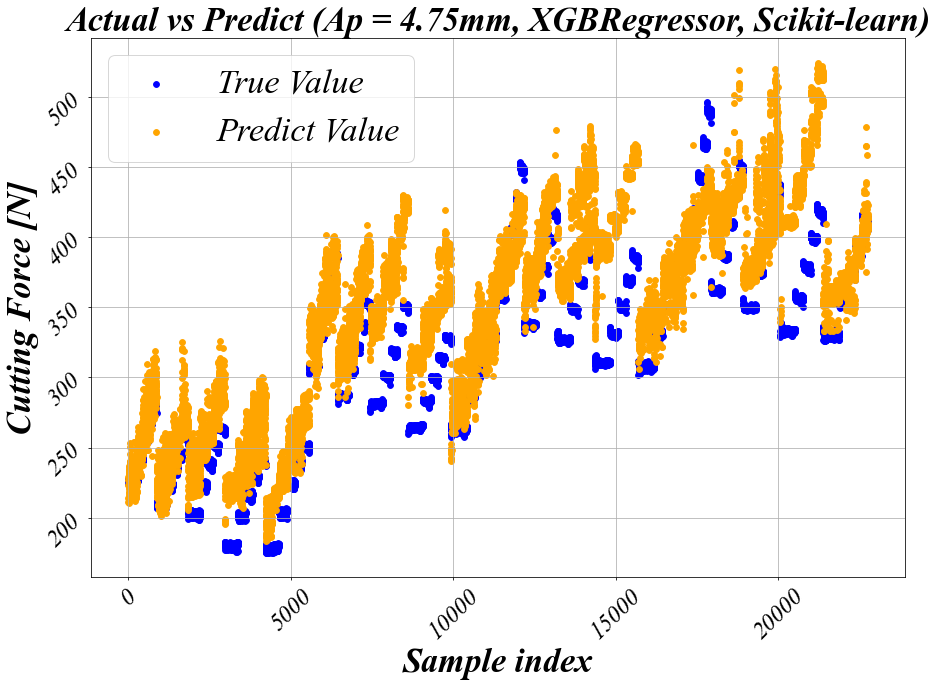

In [52]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 4.75mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

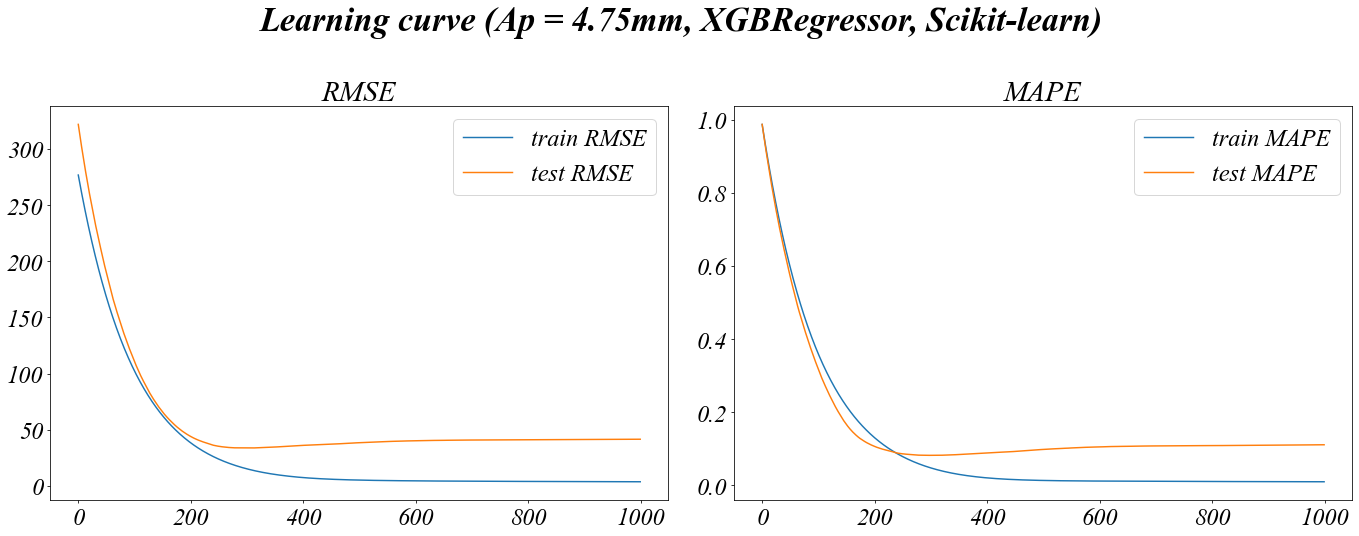

In [53]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 4.75mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 4.75mm_cycle.png")

# ***Ap 6 test***

In [54]:
train = pd.concat([ap_100, ap_225, ap_350, ap_475], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [55]:
X_test = ap_600.iloc[: , 1:]
y_test = ap_600['RMS_CF_max']

In [56]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [57]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:243.53335	validation_0-mape:0.98714	validation_1-rmse:418.09028	validation_1-mape:0.99006
[1]	validation_0-rmse:241.11173	validation_0-mape:0.97723	validation_1-rmse:414.67881	validation_1-mape:0.98180
[2]	validation_0-rmse:238.71449	validation_0-mape:0.96742	validation_1-rmse:411.30056	validation_1-mape:0.97362
[3]	validation_0-rmse:236.34118	validation_0-mape:0.95770	validation_1-rmse:407.88504	validation_1-mape:0.96515
[4]	validation_0-rmse:233.99177	validation_0-mape:0.94809	validation_1-rmse:404.60160	validation_1-mape:0.95720
[5]	validation_0-rmse:231.66580	validation_0-mape:0.93856	validation_1-rmse:401.24125	validation_1-mape:0.94886
[6]	validation_0-rmse:229.36318	validation_0-mape:0.92914	validation_1-rmse:397.95648	validation_1-mape:0.94072
[7]	validation_0-rmse:227.08376	validation_0-mape:0.91980	validation_1-rmse:394.73352	validation_1-mape:0.93292
[8]	validation_0-rmse:224.82707	validation_0-mape:0.91056	validation_1-rmse:391.48521	validation_1-mape:

[73]	validation_0-rmse:117.55312	validation_0-mape:0.47239	validation_1-rmse:242.06869	validation_1-mape:0.55798
[74]	validation_0-rmse:116.38427	validation_0-mape:0.46765	validation_1-rmse:240.55469	validation_1-mape:0.55436
[75]	validation_0-rmse:115.22731	validation_0-mape:0.46296	validation_1-rmse:239.03681	validation_1-mape:0.55076
[76]	validation_0-rmse:114.08175	validation_0-mape:0.45832	validation_1-rmse:237.56208	validation_1-mape:0.54723
[77]	validation_0-rmse:112.94776	validation_0-mape:0.45372	validation_1-rmse:236.09413	validation_1-mape:0.54373
[78]	validation_0-rmse:111.82525	validation_0-mape:0.44917	validation_1-rmse:234.62844	validation_1-mape:0.54025
[79]	validation_0-rmse:110.71446	validation_0-mape:0.44466	validation_1-rmse:233.12902	validation_1-mape:0.53668
[80]	validation_0-rmse:109.61482	validation_0-mape:0.44020	validation_1-rmse:231.64205	validation_1-mape:0.53314
[81]	validation_0-rmse:108.52622	validation_0-mape:0.43579	validation_1-rmse:230.17333	validatio

[146]	validation_0-rmse:56.85365	validation_0-mape:0.22626	validation_1-rmse:160.80999	validation_1-mape:0.36493
[147]	validation_0-rmse:56.29338	validation_0-mape:0.22399	validation_1-rmse:160.06534	validation_1-mape:0.36317
[148]	validation_0-rmse:55.73852	validation_0-mape:0.22174	validation_1-rmse:159.32775	validation_1-mape:0.36143
[149]	validation_0-rmse:55.19022	validation_0-mape:0.21952	validation_1-rmse:158.56526	validation_1-mape:0.35961
[150]	validation_0-rmse:54.64628	validation_0-mape:0.21731	validation_1-rmse:157.84233	validation_1-mape:0.35790
[151]	validation_0-rmse:54.10782	validation_0-mape:0.21513	validation_1-rmse:157.13867	validation_1-mape:0.35624
[152]	validation_0-rmse:53.57454	validation_0-mape:0.21297	validation_1-rmse:156.42658	validation_1-mape:0.35455
[153]	validation_0-rmse:53.04674	validation_0-mape:0.21083	validation_1-rmse:155.73274	validation_1-mape:0.35290
[154]	validation_0-rmse:52.52419	validation_0-mape:0.20872	validation_1-rmse:155.03651	validatio

[219]	validation_0-rmse:27.73036	validation_0-mape:0.10836	validation_1-rmse:121.84027	validation_1-mape:0.27343
[220]	validation_0-rmse:27.46240	validation_0-mape:0.10727	validation_1-rmse:121.47227	validation_1-mape:0.27260
[221]	validation_0-rmse:27.19669	validation_0-mape:0.10620	validation_1-rmse:121.10052	validation_1-mape:0.27174
[222]	validation_0-rmse:26.93371	validation_0-mape:0.10513	validation_1-rmse:120.73324	validation_1-mape:0.27088
[223]	validation_0-rmse:26.67370	validation_0-mape:0.10408	validation_1-rmse:120.38712	validation_1-mape:0.27009
[224]	validation_0-rmse:26.41650	validation_0-mape:0.10303	validation_1-rmse:120.03178	validation_1-mape:0.26929
[225]	validation_0-rmse:26.16163	validation_0-mape:0.10200	validation_1-rmse:119.68478	validation_1-mape:0.26847
[226]	validation_0-rmse:25.90938	validation_0-mape:0.10098	validation_1-rmse:119.34037	validation_1-mape:0.26765
[227]	validation_0-rmse:25.65949	validation_0-mape:0.09997	validation_1-rmse:118.97859	validatio

[292]	validation_0-rmse:13.89637	validation_0-mape:0.05199	validation_1-rmse:102.48644	validation_1-mape:0.22905
[293]	validation_0-rmse:13.77068	validation_0-mape:0.05147	validation_1-rmse:102.31121	validation_1-mape:0.22864
[294]	validation_0-rmse:13.64646	validation_0-mape:0.05096	validation_1-rmse:102.14100	validation_1-mape:0.22826
[295]	validation_0-rmse:13.52345	validation_0-mape:0.05045	validation_1-rmse:101.96845	validation_1-mape:0.22786
[296]	validation_0-rmse:13.40183	validation_0-mape:0.04995	validation_1-rmse:101.79747	validation_1-mape:0.22747
[297]	validation_0-rmse:13.28158	validation_0-mape:0.04945	validation_1-rmse:101.62458	validation_1-mape:0.22709
[298]	validation_0-rmse:13.16235	validation_0-mape:0.04896	validation_1-rmse:101.45113	validation_1-mape:0.22669
[299]	validation_0-rmse:13.04463	validation_0-mape:0.04848	validation_1-rmse:101.28620	validation_1-mape:0.22630
[300]	validation_0-rmse:12.92801	validation_0-mape:0.04800	validation_1-rmse:101.12761	validatio

[366]	validation_0-rmse:7.48254	validation_0-mape:0.02544	validation_1-rmse:93.37743	validation_1-mape:0.20824
[367]	validation_0-rmse:7.42762	validation_0-mape:0.02521	validation_1-rmse:93.29082	validation_1-mape:0.20804
[368]	validation_0-rmse:7.37329	validation_0-mape:0.02499	validation_1-rmse:93.20836	validation_1-mape:0.20785
[369]	validation_0-rmse:7.31952	validation_0-mape:0.02476	validation_1-rmse:93.12668	validation_1-mape:0.20767
[370]	validation_0-rmse:7.26663	validation_0-mape:0.02454	validation_1-rmse:93.05447	validation_1-mape:0.20754
[371]	validation_0-rmse:7.21380	validation_0-mape:0.02432	validation_1-rmse:92.97412	validation_1-mape:0.20735
[372]	validation_0-rmse:7.16197	validation_0-mape:0.02411	validation_1-rmse:92.89212	validation_1-mape:0.20715
[373]	validation_0-rmse:7.11117	validation_0-mape:0.02390	validation_1-rmse:92.80856	validation_1-mape:0.20696
[374]	validation_0-rmse:7.06115	validation_0-mape:0.02369	validation_1-rmse:92.71284	validation_1-mape:0.20673
[

[440]	validation_0-rmse:4.80012	validation_0-mape:0.01456	validation_1-rmse:88.87118	validation_1-mape:0.19780
[441]	validation_0-rmse:4.77820	validation_0-mape:0.01447	validation_1-rmse:88.83722	validation_1-mape:0.19777
[442]	validation_0-rmse:4.75676	validation_0-mape:0.01439	validation_1-rmse:88.79538	validation_1-mape:0.19767
[443]	validation_0-rmse:4.73560	validation_0-mape:0.01431	validation_1-rmse:88.76446	validation_1-mape:0.19765
[444]	validation_0-rmse:4.71575	validation_0-mape:0.01423	validation_1-rmse:88.72184	validation_1-mape:0.19755
[445]	validation_0-rmse:4.69550	validation_0-mape:0.01416	validation_1-rmse:88.68495	validation_1-mape:0.19746
[446]	validation_0-rmse:4.67517	validation_0-mape:0.01408	validation_1-rmse:88.65510	validation_1-mape:0.19744
[447]	validation_0-rmse:4.65542	validation_0-mape:0.01401	validation_1-rmse:88.61842	validation_1-mape:0.19735
[448]	validation_0-rmse:4.63580	validation_0-mape:0.01393	validation_1-rmse:88.57521	validation_1-mape:0.19725
[

[514]	validation_0-rmse:3.75135	validation_0-mape:0.01087	validation_1-rmse:86.77388	validation_1-mape:0.19371
[515]	validation_0-rmse:3.74253	validation_0-mape:0.01084	validation_1-rmse:86.75111	validation_1-mape:0.19366
[516]	validation_0-rmse:3.73418	validation_0-mape:0.01082	validation_1-rmse:86.73675	validation_1-mape:0.19366
[517]	validation_0-rmse:3.72603	validation_0-mape:0.01079	validation_1-rmse:86.72553	validation_1-mape:0.19364
[518]	validation_0-rmse:3.71734	validation_0-mape:0.01077	validation_1-rmse:86.69942	validation_1-mape:0.19358
[519]	validation_0-rmse:3.70911	validation_0-mape:0.01074	validation_1-rmse:86.67979	validation_1-mape:0.19354
[520]	validation_0-rmse:3.70105	validation_0-mape:0.01072	validation_1-rmse:86.66153	validation_1-mape:0.19352
[521]	validation_0-rmse:3.69341	validation_0-mape:0.01070	validation_1-rmse:86.64413	validation_1-mape:0.19348
[522]	validation_0-rmse:3.68566	validation_0-mape:0.01067	validation_1-rmse:86.63094	validation_1-mape:0.19349
[

[588]	validation_0-rmse:3.32315	validation_0-mape:0.00964	validation_1-rmse:85.71811	validation_1-mape:0.19196
[589]	validation_0-rmse:3.31899	validation_0-mape:0.00963	validation_1-rmse:85.70425	validation_1-mape:0.19194
[590]	validation_0-rmse:3.31533	validation_0-mape:0.00962	validation_1-rmse:85.69495	validation_1-mape:0.19194
[591]	validation_0-rmse:3.31114	validation_0-mape:0.00961	validation_1-rmse:85.69386	validation_1-mape:0.19195
[592]	validation_0-rmse:3.30746	validation_0-mape:0.00960	validation_1-rmse:85.66568	validation_1-mape:0.19189
[593]	validation_0-rmse:3.30392	validation_0-mape:0.00959	validation_1-rmse:85.66173	validation_1-mape:0.19190
[594]	validation_0-rmse:3.29988	validation_0-mape:0.00958	validation_1-rmse:85.63415	validation_1-mape:0.19184
[595]	validation_0-rmse:3.29641	validation_0-mape:0.00957	validation_1-rmse:85.62227	validation_1-mape:0.19182
[596]	validation_0-rmse:3.29294	validation_0-mape:0.00956	validation_1-rmse:85.61038	validation_1-mape:0.19180
[

[662]	validation_0-rmse:3.09574	validation_0-mape:0.00911	validation_1-rmse:85.11912	validation_1-mape:0.19125
[663]	validation_0-rmse:3.09305	validation_0-mape:0.00910	validation_1-rmse:85.10430	validation_1-mape:0.19123
[664]	validation_0-rmse:3.09094	validation_0-mape:0.00910	validation_1-rmse:85.10465	validation_1-mape:0.19124
[665]	validation_0-rmse:3.08853	validation_0-mape:0.00909	validation_1-rmse:85.10047	validation_1-mape:0.19124
[666]	validation_0-rmse:3.08592	validation_0-mape:0.00908	validation_1-rmse:85.10031	validation_1-mape:0.19127
[667]	validation_0-rmse:3.08385	validation_0-mape:0.00908	validation_1-rmse:85.09498	validation_1-mape:0.19127
[668]	validation_0-rmse:3.08165	validation_0-mape:0.00907	validation_1-rmse:85.09015	validation_1-mape:0.19126
[669]	validation_0-rmse:3.07956	validation_0-mape:0.00907	validation_1-rmse:85.08785	validation_1-mape:0.19126
[670]	validation_0-rmse:3.07747	validation_0-mape:0.00906	validation_1-rmse:85.08756	validation_1-mape:0.19126
[

[736]	validation_0-rmse:2.96034	validation_0-mape:0.00881	validation_1-rmse:84.99960	validation_1-mape:0.19178
[737]	validation_0-rmse:2.95865	validation_0-mape:0.00880	validation_1-rmse:84.99559	validation_1-mape:0.19177
[738]	validation_0-rmse:2.95719	validation_0-mape:0.00880	validation_1-rmse:84.99110	validation_1-mape:0.19176
[739]	validation_0-rmse:2.95607	validation_0-mape:0.00880	validation_1-rmse:84.98776	validation_1-mape:0.19176
[740]	validation_0-rmse:2.95470	validation_0-mape:0.00879	validation_1-rmse:84.99007	validation_1-mape:0.19179
[741]	validation_0-rmse:2.95294	validation_0-mape:0.00879	validation_1-rmse:84.98643	validation_1-mape:0.19179
[742]	validation_0-rmse:2.95129	validation_0-mape:0.00879	validation_1-rmse:84.99064	validation_1-mape:0.19183
[743]	validation_0-rmse:2.94961	validation_0-mape:0.00878	validation_1-rmse:84.98730	validation_1-mape:0.19182
[744]	validation_0-rmse:2.94803	validation_0-mape:0.00878	validation_1-rmse:84.98390	validation_1-mape:0.19181
[

[810]	validation_0-rmse:2.85111	validation_0-mape:0.00856	validation_1-rmse:84.90502	validation_1-mape:0.19211
[811]	validation_0-rmse:2.84996	validation_0-mape:0.00856	validation_1-rmse:84.90187	validation_1-mape:0.19210
[812]	validation_0-rmse:2.84882	validation_0-mape:0.00855	validation_1-rmse:84.89962	validation_1-mape:0.19210
[813]	validation_0-rmse:2.84758	validation_0-mape:0.00855	validation_1-rmse:84.89484	validation_1-mape:0.19209
[814]	validation_0-rmse:2.84610	validation_0-mape:0.00855	validation_1-rmse:84.89972	validation_1-mape:0.19213
[815]	validation_0-rmse:2.84436	validation_0-mape:0.00854	validation_1-rmse:84.90014	validation_1-mape:0.19213
[816]	validation_0-rmse:2.84359	validation_0-mape:0.00854	validation_1-rmse:84.89518	validation_1-mape:0.19212
[817]	validation_0-rmse:2.84251	validation_0-mape:0.00854	validation_1-rmse:84.89336	validation_1-mape:0.19212
[818]	validation_0-rmse:2.84070	validation_0-mape:0.00853	validation_1-rmse:84.88707	validation_1-mape:0.19211
[

[884]	validation_0-rmse:2.75682	validation_0-mape:0.00834	validation_1-rmse:84.81001	validation_1-mape:0.19222
[885]	validation_0-rmse:2.75576	validation_0-mape:0.00834	validation_1-rmse:84.81043	validation_1-mape:0.19222
[886]	validation_0-rmse:2.75373	validation_0-mape:0.00834	validation_1-rmse:84.80491	validation_1-mape:0.19221
[887]	validation_0-rmse:2.75254	validation_0-mape:0.00833	validation_1-rmse:84.80420	validation_1-mape:0.19221
[888]	validation_0-rmse:2.75163	validation_0-mape:0.00833	validation_1-rmse:84.80414	validation_1-mape:0.19222
[889]	validation_0-rmse:2.74923	validation_0-mape:0.00833	validation_1-rmse:84.80579	validation_1-mape:0.19222
[890]	validation_0-rmse:2.74842	validation_0-mape:0.00832	validation_1-rmse:84.80707	validation_1-mape:0.19223
[891]	validation_0-rmse:2.74741	validation_0-mape:0.00832	validation_1-rmse:84.80301	validation_1-mape:0.19223
[892]	validation_0-rmse:2.74561	validation_0-mape:0.00832	validation_1-rmse:84.80300	validation_1-mape:0.19223
[

[958]	validation_0-rmse:2.65776	validation_0-mape:0.00811	validation_1-rmse:84.76951	validation_1-mape:0.19246
[959]	validation_0-rmse:2.65674	validation_0-mape:0.00811	validation_1-rmse:84.76955	validation_1-mape:0.19247
[960]	validation_0-rmse:2.65499	validation_0-mape:0.00810	validation_1-rmse:84.77339	validation_1-mape:0.19249
[961]	validation_0-rmse:2.65376	validation_0-mape:0.00810	validation_1-rmse:84.77306	validation_1-mape:0.19249
[962]	validation_0-rmse:2.65232	validation_0-mape:0.00809	validation_1-rmse:84.77324	validation_1-mape:0.19249
[963]	validation_0-rmse:2.65137	validation_0-mape:0.00809	validation_1-rmse:84.77422	validation_1-mape:0.19250
[964]	validation_0-rmse:2.65070	validation_0-mape:0.00809	validation_1-rmse:84.77426	validation_1-mape:0.19250
[965]	validation_0-rmse:2.64970	validation_0-mape:0.00809	validation_1-rmse:84.77429	validation_1-mape:0.19250
[966]	validation_0-rmse:2.64848	validation_0-mape:0.00808	validation_1-rmse:84.77639	validation_1-mape:0.19251
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 2.6113
Train MAPE: 0.8000
Test RMSE: 84.7744
Test MAPE: 19.2632


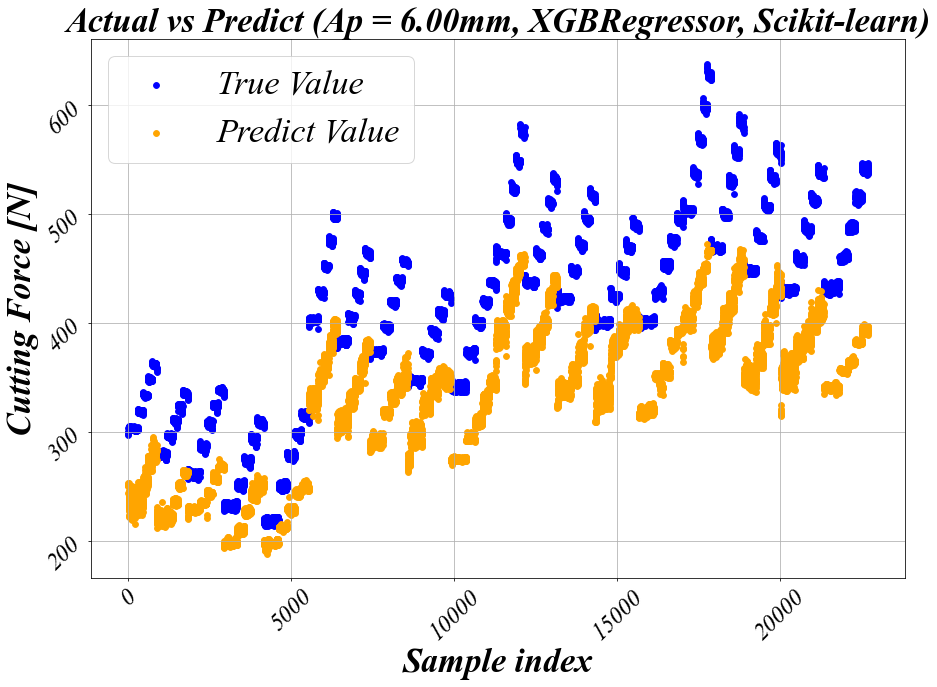

In [59]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 6.00mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

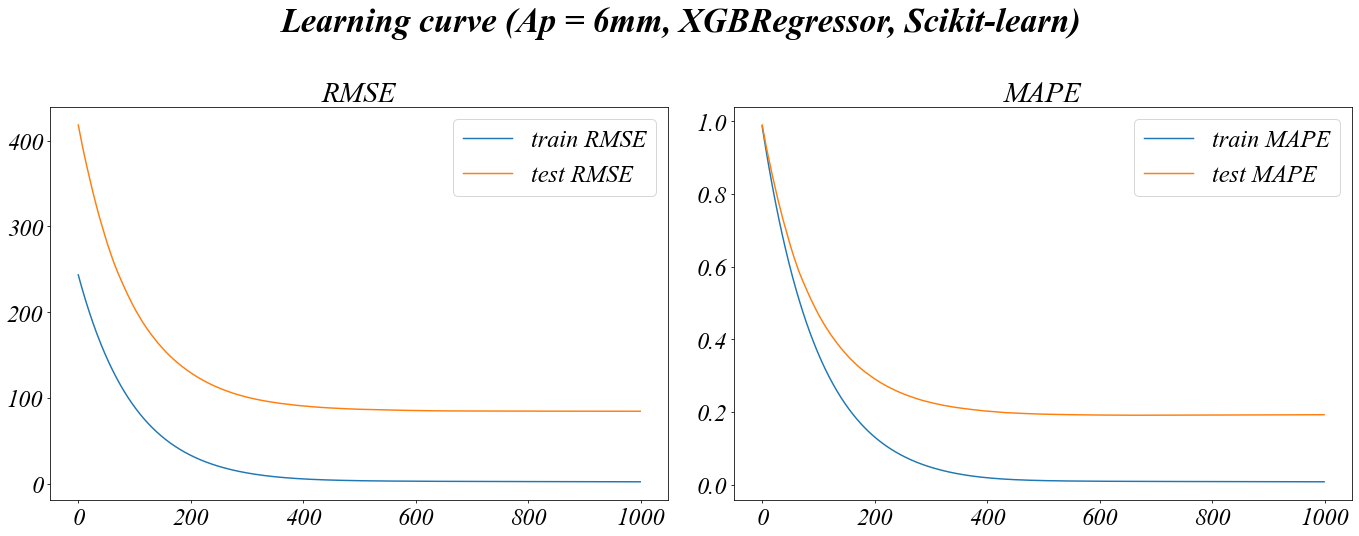

In [60]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 6mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 6mm_cycle.png")